<a href="https://colab.research.google.com/github/AlvinSMoyo/NLFxbI8E2LD5JDPY/blob/main/Potential_Talents_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potential Talents


## 📘 Project Overview<a name="project-overview"></a>

---


**Background:**

As a talent sourcing and management company, we are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this requires understanding the client’s needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third, where to find talented individuals is another challenge.

The nature of our job requires a lot of human labor and is full of manual operations. Towards automating this process we want to build a better approach that could save us time and finally help us spot potential candidates that could fit the roles we are in search for. Moreover, going beyond that for a specific role we want to fill in we are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness.

We are right now semi-automatically sourcing a few candidates, therefore the sourcing part is not a concern at this time but we expect to first determine best matching candidates based on how fit these candidates are for a given role. We generally make these searches based on some keywords such as “full-stack software engineer”, “engineering manager” or “aspiring human resources” based on the role we are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you.

Assuming that we were able to list and rank fitting candidates, we then employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually and at the end of this manual review, we might choose not the first fitting candidate in the list but maybe the 7th candidate in the list. If that happens, we are interested in being able to re-rank the previous list based on this information. This supervisory signal is going to be supplied by starring the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, we expect the list to be re-ranked each time a candidate is starred.

**Data Description:**

The data comes from our sourcing efforts. We removed any field that could directly reveal personal details and gave a unique identifier for each candidate.

Attributes:
id : unique identifier for candidate (numeric)

job_title : job title for candidate (text)

location : geographical location for candidate (text)

connections: number of connections candidate has, 500+ means over 500 (text)

Output (desired target):
fit - how fit the candidate is for the role? (numeric, probability between 0-1)

Keywords: “Aspiring human resources” or “seeking human resources”

**Download Data:**

https://docs.google.com/spreadsheets/d/117X6i53dKiO7w6kuA1g1TpdTlv1173h_dPlJt5cNNMU/edit?usp=sharing

**Goal(s):**

Predict how fit the candidate is based on their available information (variable fit)

**Success Metric(s):**

Rank candidates based on a fitness score.

Re-rank candidates when a candidate is starred.

**Current Challenges:**

We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action.

How can we filter out candidates which in the first place should not be in this list?

Can we determine a cut-off point that would work for other roles without losing high potential candidates?

Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias?

---

- [📘 Project Overview](#project-overview)
- [🧰 Setup & Initial Checks](#setup--initial-checks)

- [📊 Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
  - [🔢 Value Counts for Categorical Columns](#value-counts-for-categorical-columns)
  - [🧼 Sanity Checks: Missing Values and Duplicates](#sanity-checks-missing-values-and-duplicates)
  - [📊 Visual Exploration of Key Categorical Features](#visual-exploration-of-key-categorical-features)

- [🧹 Text Cleaning & Normalization](#text-cleaning--normalization)
  - [✍️ Clean and Normalize Job Titles](#clean-and-normalize-job-titles)
  - [☁️ WordCloud of Candidate Job Titles](#wordcloud-of-candidate-job-titles)

- [☁️ Job Title Similarity Scoring](#job-title-similarity-scoring)
  - [🎯 Defining the Target Role for Similarity Scoring](#defining-the-target-role-for-similarity-scoring)
  - [🧮 TF-IDF Vectorization](#tf-idf-vectorization)
  - [📊 Distribution of Similarity Scores](#distribution-of-similarity-scores)

- [🧪 Simulation: Semantic Reranking with S-BERT](#simulation-semantic-reranking-with-s-bert)
  - [📌 Initial Ranking Based on Manual Query](#initial-ranking-based-on-manual-query)
  - [⭐ Re-Ranking Based on Starred Candidate](#re-ranking-based-on-starred-candidate)
  - [🔍 Comparison: Manual Query vs Starred Candidate Reranking](#comparison-manual-query-vs-starred-candidate-reranking)

- [🕵️‍♂️ Reranking with Classic Word Embeddings](#reranking-with-classic-word-embeddings)
  - [🕵️‍♂️ Classic Embeddings: Similarity to 'HR Manager'](#classic-embeddings-similarity-to-hr-manager)
  - [🧠 S-BERT vs Classic Embeddings: Consensus, Conflicts, and Ensemble Scoring](#s-bert-vs-classic-embeddings-consensus-conflicts-and-ensemble-scoring)
  - [🌡️ Rank Alignment Across All Models](#rank-alignment-across-all-models)

- [🔄 Clustering Candidate Profiles](#clustering-candidate-profiles)
  - [📉 Elbow Method: Visualizing Optimal Number of Clusters](#elbow-method-visualizing-optimal-number-of-clusters)
  - [📊 Silhouette Score Comparison: Cluster Cohesion & Separation](#silhouette-score-comparison-cluster-cohesion--separation)
  - [🧩 Cluster Comparison Summary (k = 9)](#cluster-comparison-summary-k--9)

- [🚀 Deep Semantic Clustering with UMAP + HDBSCAN](#deep-semantic-clustering-with-umap--hdbscan)
  - [🌀 UMAP Visualization Insight](#umap-visualization-insight)
  - [🔄 Cluster Alignment Summary: KMeans (k=9) vs HDBSCAN](#cluster-alignment-summary-kmeans-k9-vs-hdbscan)

- [🧠 LLM-Guided Fit Classification (Simulated)](#llm-guided-fit-classification-simulated)
  - [🧮 Cluster Alignment with LLM-Predicted Fit Labels](#cluster-alignment-with-llm-predicted-fit-labels)
  - [🎨 Visualizing LLM-Based Candidate Fit](#visualizing-llm-based-candidate-fit)
  - [📍 LLM Label Distribution Across KMeans Clusters](#llm-label-distribution-across-kmeans-clusters)

- [🤖 Predicting Candidate Fit with Supervised ML](#predicting-candidate-fit-with-supervised-ml)
  - [🤖 Predictive Model: Candidate Fit Classifier](#predictive-model-candidate-fit-classifier)
  - [📊 Confusion Matrices](#confusion-matrices)
  - [🧪 Model-Derived Fitness Score (fit)](#model-derived-fitness-score-fit)

- [🌟 Conclusion & Final Recommendations](#conclusion--final-recommendations)

---


## 🧰 Setup & Initial Checks<a name="setup--initial-checks"></a>


### 💻 Install & Import Libraries
> 💡 *Tip: All packages are pinned for reproducibility. If using a newer environment, verify model behavior before upgrading libraries.*


In [1]:
# Install PyTorch for CPU
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu -q --user

# Install torchvision explicitly with CPU support
!pip install --upgrade torchvision --index-url https://download.pytorch.org/whl/cpu -q --user

# Install transformers again to potentially fix operator issues
!pip install --upgrade transformers -q --user

In [2]:
# Core Data Science & Machine Learning Stack (with specific versions)
!pip install --upgrade numpy pandas==2.2.2 scikit-learn==1.2.2 matplotlib==3.8.0 seaborn==0.13.1 \
umap-learn hdbscan yellowbrick scipy -q --user

# Natural Language Processing (NLP) & Text Analysis
!pip install nltk wordcloud gensim sentence-transformers -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 21.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0+cpu which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompa

In [3]:
# 📊 Data Manipulation & Utilities
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# 🧹 Text Preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from sentence_transformers import SentenceTransformer, util

# 📥 Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# 💬 NLP & Embeddings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import gensim.downloader as api


# 🧠 Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 🧪 Dimensionality Reduction & Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import hdbscan

# 📉 Visualize Elbow Curve & Silhouette Scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# 🔗 Similarity & Feature Engineering
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack


# 📦 System/Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### 🗂️ Load Dataset

In [4]:
# Installing the dataset
talents = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')

In [5]:
# Main working copy
df = talents.copy()

### 📋 Basic Data Inspection

In [6]:
df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [7]:
# checking shape of the data
def get_num_rows(df): return df.shape[0]
def get_num_cols(df): return df.shape[1]

print(f'\n🔍 The dataset has {get_num_rows(df)} rows and {get_num_cols(df)} columns.')


🔍 The dataset has 104 rows and 5 columns.


The dataset contains 104 anonymized candidate records sourced from a talent acquisition platform. Key features include:

- **job_title**: Text field describing the candidate’s current or past role.
- **location**: The geographical location of the candidate.
- **connection**: A proxy for professional network size (e.g., "500+").
- **fit**: A placeholder column for ranking suitability to a given role (initially empty, expected to be predicted).

Initial exploration suggests that textual fields like `job_title` will be key for NLP-based ranking and keyword-driven searches.


In [8]:
# Quick structural summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [9]:
# Since most columns are categorical/text, describe() won't add much — but try for completeness:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,104.0,NaN,NaN,NaN,52.5,30.166206,1.0,26.75,52.5,78.25,104.0
job_title,104,52,2019 C.T. Bauer College of Business Graduate (...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,104,41,Kanada,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connection,104,33,500+,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We performed an initial scan of the dataset structure using `.info()` and `.describe()`:

- All 104 entries are complete for `id`, `job_title`, `location`, and `connection`.
- The `fit` column has no values yet — this will be predicted or used in downstream re-ranking logic.
- Most fields are textual in nature; hence, `.describe()` provides basic frequency and unique value distributions rather than numerical stats.


## 📊 Exploratory Data Analysis (EDA)<a name="exploratory-data-analysis-eda"></a>

### 🔢 Value Counts for Categorical Columns

In [10]:
# Value counts for all object-type (categorical) columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 Value counts for: {col}")
    print(df[col].value_counts().head(10))


🔹 Value counts for: job_title
job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional       7
Aspiring Human Resources Professional                                                                          7
Student at Humber College and Aspiring Human Resources Generalist                                              7
People Development Coordinator at Ryan                                                                         6
Native English Teacher at EPIK (English Program in Korea)                                                      5
Aspiring Human Resources Specialist                                                                            5
HR Senior Specialist                                                                                           5
Student at Chapman University                                                                                  4
SVP, CHRO, Marketing & Communications, CSR Officer | EN

To explore the categorical variables, we ran `.value_counts()` on each text-based column:

- **Job Titles** show a wide variety with no overwhelming duplication, though "Aspiring Human Resources" appears prominently.
- **Locations** reflect a global candidate pool, with several U.S. cities recurring.
- **Connections** are mostly either numerical or `"500+"`, indicating the platform likely capped visible counts beyond a threshold.


### 🧼 Sanity Checks: Missing Values and Duplicates

In [11]:
# Sanity Checks: Missing Values and Duplicates

# Check for missing values across all columns
missing = df.isna().sum()
print("🧼 Missing Values:\n", missing[missing > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🧯 Duplicate Records: {duplicates}")

🧼 Missing Values:
 fit    104
dtype: int64

🧯 Duplicate Records: 0


We then performed basic sanity checks:

- ✅ No missing values were found in any of the core features.
- ✅ No duplicate candidate records were detected.

These checks confirm the dataset is structurally clean and ready for further semantic and feature-level exploration.


### 📊 Visual Exploration of Key Categorical Features

To better understand candidate distribution across location and network size, we visualized the most common categories in `location` and `connection` using bar charts.


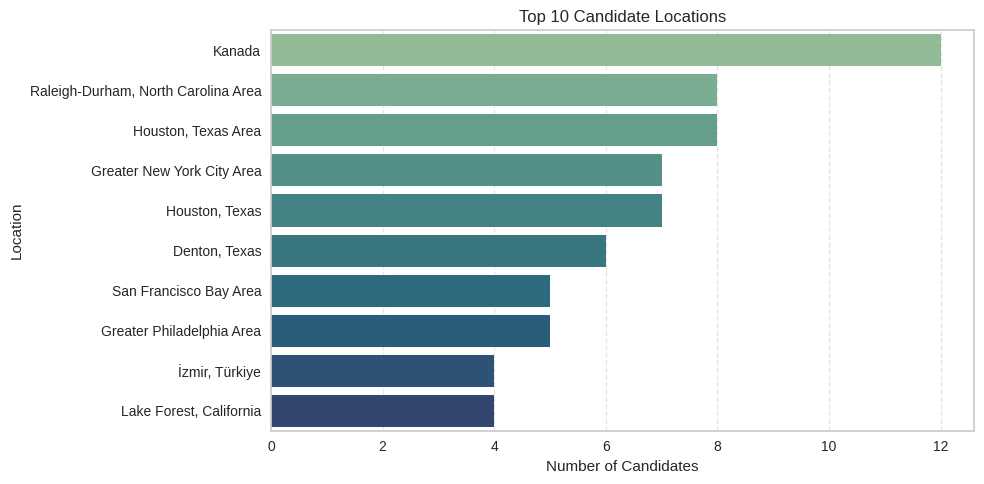

In [12]:
# Top Candidate Locations
plt.figure(figsize=(10, 5))
sns.countplot(y="location", data=df, order=df["location"].value_counts().head(10).index, palette="crest")
plt.title("Top 10 Candidate Locations")
plt.xlabel("Number of Candidates")
plt.ylabel("Location")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

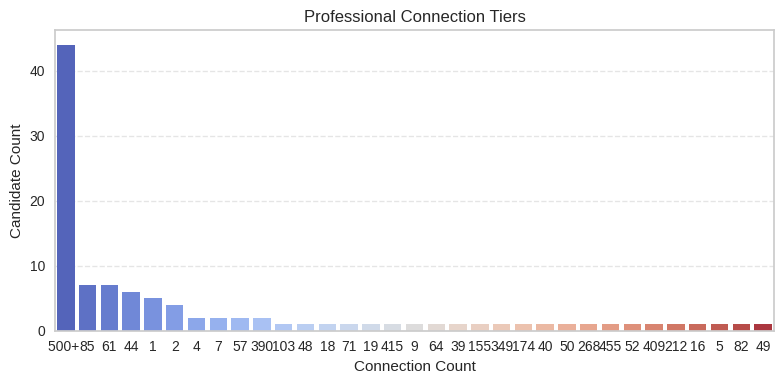

In [13]:
# Distribution of Connection Sizes
plt.figure(figsize=(8, 4))
sns.countplot(x="connection", data=df, order=df["connection"].value_counts().index, palette="coolwarm")
plt.title("Professional Connection Tiers")
plt.xlabel("Connection Count")
plt.ylabel("Candidate Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

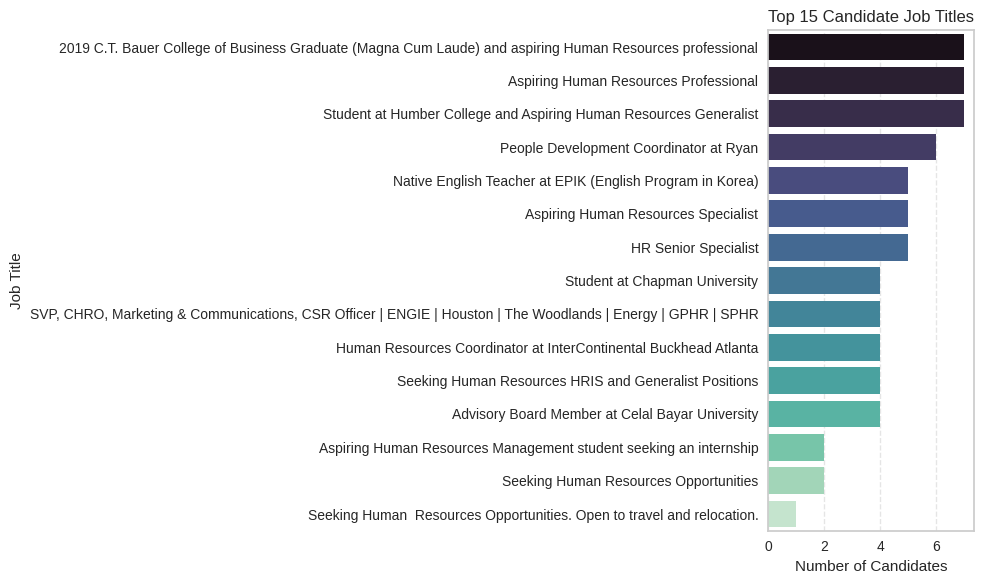

In [14]:
# Most Common Job Titles
plt.figure(figsize=(10, 6))
sns.countplot(y="job_title", data=df, order=df["job_title"].value_counts().head(15).index, palette="mako")
plt.title("Top 15 Candidate Job Titles")
plt.xlabel("Number of Candidates")
plt.ylabel("Job Title")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### 🔍 Job Title & Location Distribution

Understanding where common job titles are concentrated geographically can reveal candidate sourcing patterns or regional HR trends. We used bar plots and a focused heatmap to explore these patterns in the top segments of our data.


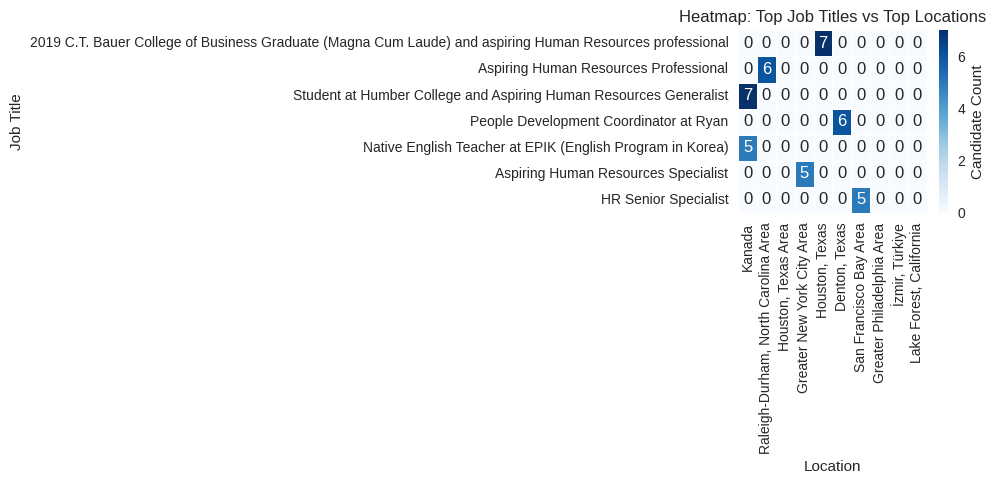

In [15]:
# Heatmap: Top Job Titles vs Top Locations
top_locations = df["location"].value_counts().head(10).index
top_titles = df["job_title"].value_counts().head(7).index

heatmap_data = pd.crosstab(df["job_title"], df["location"])
heatmap_data = heatmap_data.loc[top_titles, top_locations]  # rows = job_title, cols = location

plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Blues",
    fmt="d",
    linewidths=0.5,
    cbar_kws={"label": "Candidate Count"}
)
plt.title("Heatmap: Top Job Titles vs Top Locations")
plt.xlabel("Location")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

### ✅ EDA Summary

Our exploratory analysis revealed key structural and contextual insights about the dataset:

- The dataset is clean, with no missing or duplicate records.
- Job titles are highly varied and semantically rich — perfect for NLP-based modeling.
- Candidates are globally distributed, with certain roles more prominent in specific locations.
- Most professional connection counts cluster around platform thresholds like "500+".
- Visual exploration of job title vs. location surfaced meaningful clusters and regional trends.

These findings support the decision to use **job title semantics as the primary driver** for fit prediction and candidate ranking in the downstream modeling pipeline.


___


## 🧹 Text Cleaning & Normalization<a name="text-cleaning--normalization"></a>

To prepare job titles for NLP-based modeling, we applied several preprocessing steps to standardize the text and reduce noise.



In [16]:
# Define text cleaning function
# Converts to lowercase, strips punctuation/numbers, trims whitespace
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [17]:
# Stopword Removal & Lemmatization
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    text = clean_text(text)
    tokens = nltk.word_tokenize(text)
    filtered = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]
    return " ".join(filtered)

In [18]:
# Required for TextBlob's tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
# Create a clean version of job titles
df["job_title_clean"] = df["job_title"].apply(clean_and_lemmatize)

### ✍️ Clean and Normalize Job Titles

We created a `job_title_clean` column using the following steps:
- Lowercased all text
- Removed punctuation and digits
- Tokenized the text
- Removed stopwordsusing NLTK’s English stopword list
- Lemmatized each token to reduce words to their base form

These cleaned job titles form the basis of downstream similarity scoring and modeling.

---
### ☁️ WordCloud of Candidate Job Titles

We used the cleaned job titles to generate a WordCloud that visualizes the most frequent terms across all candidates. This at-a-glance view reveals dominant patterns and HR-aligned themes — useful for identifying signal-rich titles before moving into vectorization or ranking.


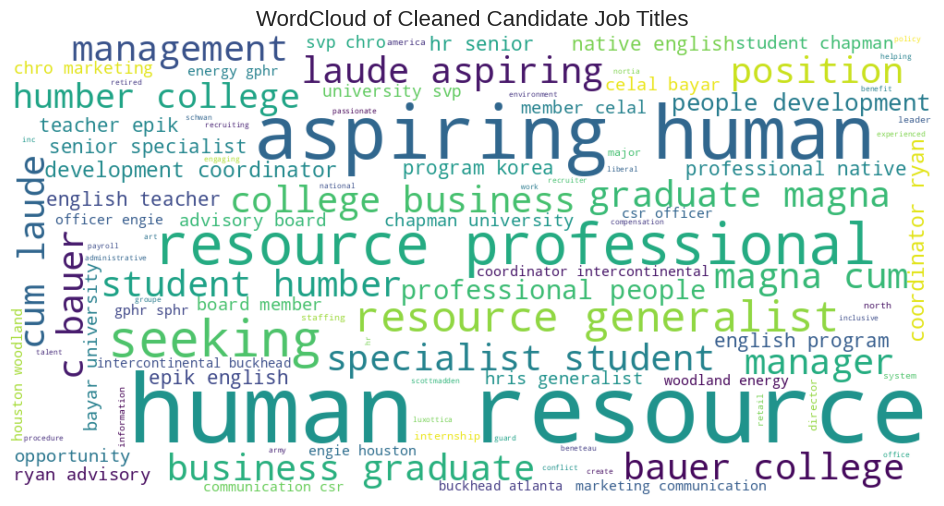

In [20]:
# Combine all cleaned job titles into one large text
all_titles = " ".join(df["job_title_clean"].dropna())

# Generate and display the WordCloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="viridis",
    max_words=100
).generate(all_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Cleaned Candidate Job Titles", fontsize=16)
plt.show()

## ☁️ Job Title Similarity Scoring<a name="job-title-similarity-scoring"></a>

This section focuses on converting candidate job titles into numerical vectors using TF-IDF, then scoring them for similarity against the target role: `"aspiring human resources"`.


### 🎯 Defining the Target Role for Similarity Scoring

We used `"aspiring human resources"` as the reference role to compare against all job titles. It was cleaned using the same method applied to the dataset.


In [21]:
# Define the job title we're targeting
target_role = "aspiring human resources"

# Clean it using the same function we used on the dataset
target_clean = clean_and_lemmatize(target_role)

### 🧮 TF-IDF Vectorization

TF-IDF (Term Frequency–Inverse Document Frequency) converts text into numerical form by highlighting unique terms. This helps us numerically compare each job title based on its content.

In [22]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit on all job titles + target role
corpus = df["job_title_clean"].tolist() + [target_clean]
tfidf_matrix = vectorizer.fit_transform(corpus)

### 📏 Cosine Similarity to Target Role

We used cosine similarity to calculate how close each job title is to the target role. A higher score means greater alignment. These scores are later used in clustering and classification.


In [23]:
# Compute cosine similarity between each candidate and the target role (last entry)
cos_sim = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1:]).flatten()

# Add similarity scores to the dataframe
df["similarity_to_target"] = cos_sim

#### 🔝 Ranked Candidates by Similarity

We ranked all candidates based on their cosine similarity to the target role. This score reflects how closely their job title matches the reference — `"aspiring human resources"`.

Below is a preview of the top matches:


In [24]:
# Sort by descending similarity
df_ranked = df.sort_values(by="similarity_to_target", ascending=False)

# Show top 10 matches
df_ranked[["job_title", "similarity_to_target"]].head(10)

,job_title,similarity_to_target
57,Aspiring Human Resources Professional,0.756159
2,Aspiring Human Resources Professional,0.756159
20,Aspiring Human Resources Professional,0.756159
32,Aspiring Human Resources Professional,0.756159
96,Aspiring Human Resources Professional,0.756159
16,Aspiring Human Resources Professional,0.756159
45,Aspiring Human Resources Professional,0.756159
23,Aspiring Human Resources Specialist,0.692278
48,Aspiring Human Resources Specialist,0.692278
5,Aspiring Human Resources Specialist,0.692278


#### 📊 Distribution of Similarity Scores

The histogram below shows how similarity scores are distributed across all candidates. This helps visualize cutoff points and identify natural clusters of strong, weak, or ambiguous fits.


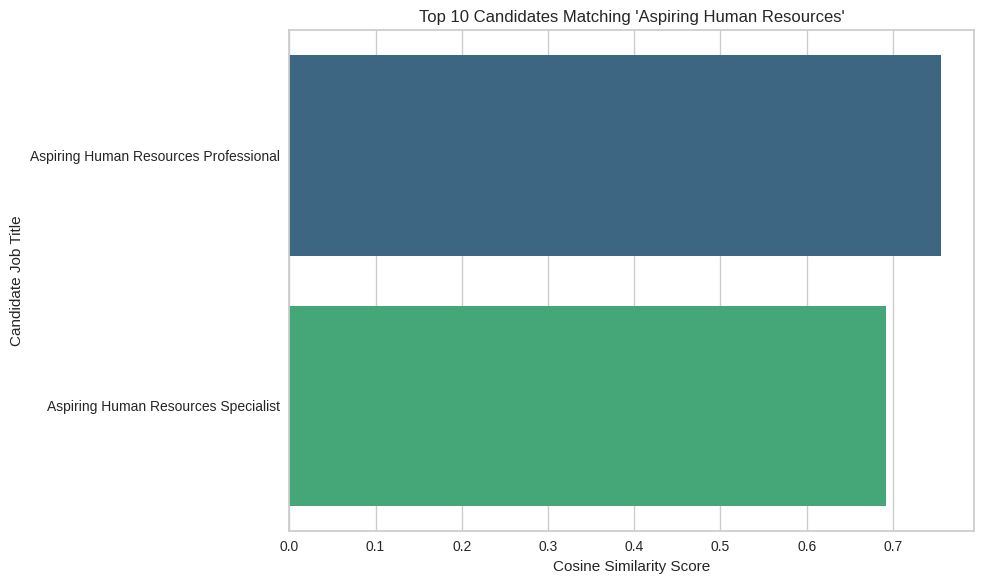

In [25]:
# Select top 10 most similar candidates
top_10 = df_ranked[["job_title", "similarity_to_target"]].head(10)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    y="job_title",
    x="similarity_to_target",
    palette="viridis"
)
plt.title("Top 10 Candidates Matching 'Aspiring Human Resources'")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Candidate Job Title")
plt.tight_layout()
plt.show()

## 🧪 Simulation: Semantic Reranking with S-BERT<a name="simulation-semantic-reranking-with-s-bert"></a>

To simulate a recruiter selecting their ideal candidate (e.g., candidate #7), we use **pre-trained Sentence-BERT embeddings** to generate semantic vector representations of each candidate’s job title.

This allows us to compare candidates based on **meaning**, not just keywords — replacing the earlier TF-IDF and sentiment-based ranking logic.

We simulate two ranking strategies:

1. 📌 **Initial ranking** using a manually defined query (e.g., `"People Operations Manager"`), simulating a recruiter's first search.
2. ⭐ **Dynamic reranking** using a **starred candidate** as the reference profile, mimicking a recruiter signaling "this is my ideal candidate."

> This enables a feedback-driven, **human-in-the-loop** ranking system that can evolve with recruiter preferences. It also opens the door to future enhancements like **learning-to-rank models** or embedding fine-tuning.

> The feedback-driven reranking framework also lays the groundwork for tracking human preferences over time — allowing the system to learn and adapt while preventing overreliance on subjective heuristics.


In [26]:
# Sandbox DataFrame for semantic ranking simulations (SBERT, W2V, GloVe, FastText)
df_semantics = pd.DataFrame({
    'candidate_id': [1, 2, 3, 4, 5],
    'job_title': [
        "People Operations Coordinator",
        "Marketing Communications Specialist",
        "Talent Acquisition Partner",
        "Customer Success Executive",
        "HR Business Partner"
    ]
})

In [27]:
# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and fast


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
# Safety Check: Ensure Embeddings Are Defined Before Ranking
try:
    embeddings_semantics
except NameError:
    embeddings_semantics = model.encode(df_semantics['job_title'].tolist(), convert_to_tensor=True)

# Step 1: Initial Query Ranking
query = "People Operations Manager"
query_embedding_query = model.encode(query, convert_to_tensor=True)
similarity_query = util.cos_sim(query_embedding_query, embeddings_semantics)[0].cpu().numpy()

# Step 2: Starred Candidate Feedback Ranking
starred_index = 2  # Candidate #3
query_embedding_star = embeddings_semantics[starred_index]
similarity_star = util.cos_sim(query_embedding_star, embeddings_semantics)[0].cpu().numpy()

# Append to SBERT sandbox DataFrame
df_semantics['similarity_to_query'] = similarity_query
df_semantics['similarity_to_starred'] = similarity_star

# Show both rankings (separately sorted)
df_sorted_query = df_semantics.sort_values('similarity_to_query', ascending=False).reset_index(drop=True)
df_sorted_star = df_semantics.sort_values('similarity_to_starred', ascending=False).reset_index(drop=True)

### 📌 Initial Ranking Based on Manual Query

This first ranking uses a manually defined query (e.g., "People Operations Manager"), to simulate a recruiter entering a target role. The system returns the candidates ranked by **semantic similarity** to that job title.

In [29]:
 # Show Option 1: Initial manual query
print("📌 Ranked by Query:")
display(df_sorted_query[['candidate_id', 'job_title', 'similarity_to_query']])

📌 Ranked by Query:


,candidate_id,job_title,similarity_to_query
0,1,People Operations Coordinator,0.902254
1,2,Marketing Communications Specialist,0.447177
2,5,HR Business Partner,0.379475
3,4,Customer Success Executive,0.378256
4,3,Talent Acquisition Partner,0.243616


### 📌 Initial Ranking Based on Manual Query

To simulate how a recruiter might start their search, we used **Sentence-BERT** to compute semantic similarity between the job title `"HR Manager"` and each candidate’s title.

The bar chart below shows how each candidate ranks in terms of closeness to the query — based on **sentence-level understanding**, not just keywords.

> This reveals which titles are functionally aligned with “HR Manager,” even if phrased differently.


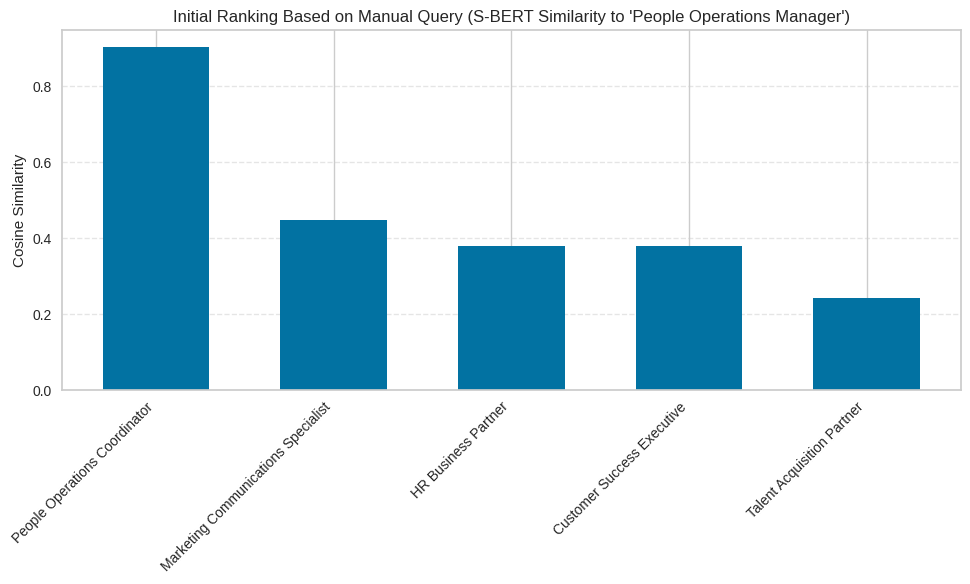

In [30]:
# Sort candidates by S-BERT similarity to the manual query
df_plot = df_sorted_query.sort_values(by='similarity_to_query', ascending=False)

# Bar plot: S-BERT similarity to query "People Operations Manager"
plt.figure(figsize=(10, 6))
plt.bar(df_plot['job_title'], df_plot['similarity_to_query'], width=0.6)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cosine Similarity")
plt.title("Initial Ranking Based on Manual Query (S-BERT Similarity to 'People Operations Manager')")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### ⭐ Re-Ranking Based on Starred Candidate

Here, we simulate a recruiter identifying an ideal profile — the system re-ranks the remaining candidates based on semantic closeness to the **starred candidate's vector**.

This reflects a real-world scenario where recruiters tweak search results after spotting a strong match. Instead of restarting the search, the system pivots and dynamically updates the candidate list to better reflect the recruiter's evolving preferences.

This lays the groundwork for a **personalized, human-in-the-loop AI system** that adapts to user feedback.


In [31]:
# Show Option 2: Feedback-based reranking (starred candidate)
print("⭐ Re-Ranked by Starred Candidate (#3):")
display(df_sorted_star[['candidate_id', 'job_title', 'similarity_to_starred']])

⭐ Re-Ranked by Starred Candidate (#3):


,candidate_id,job_title,similarity_to_starred
0,3,Talent Acquisition Partner,1.000000
1,5,HR Business Partner,0.382685
2,2,Marketing Communications Specialist,0.366675
3,4,Customer Success Executive,0.308443
4,1,People Operations Coordinator,0.264200


In [32]:
# Step 1: Create working copy for rank shift tracking
df_shift = df_semantics.copy()

# Step 2: Assign initial and reranked positions (based on S-BERT)
df_shift['initial_rank'] = df_shift['similarity_to_query'].rank(ascending=False, method='min').astype(int)
df_shift['reranked'] = df_shift['similarity_to_starred'].rank(ascending=False, method='min').astype(int)

# Step 3: Calculate shift (positive = moved up after feedback)
df_shift['rank_shift'] = df_shift['initial_rank'] - df_shift['reranked']

# Step 4: Sort by reranked rank to reflect post-feedback order
df_shift_sorted = df_shift.sort_values(by='reranked')

# Step 5: Select relevant columns to display
df_shift_table = df_shift_sorted[[
    'candidate_id', 'job_title',
    'initial_rank', 'reranked', 'rank_shift',
    'similarity_to_query', 'similarity_to_starred'
]].reset_index(drop=True)

# Step 6: Display the reranked table
display(df_shift_table)


,candidate_id,job_title,initial_rank,reranked,rank_shift,similarity_to_query,similarity_to_starred
0,3,Talent Acquisition Partner,5,1,4,0.243616,1.000000
1,5,HR Business Partner,3,2,1,0.379475,0.382685
2,2,Marketing Communications Specialist,2,3,-1,0.447177,0.366675
3,4,Customer Success Executive,4,4,0,0.378256,0.308443
4,1,People Operations Coordinator,1,5,-4,0.902254,0.264200


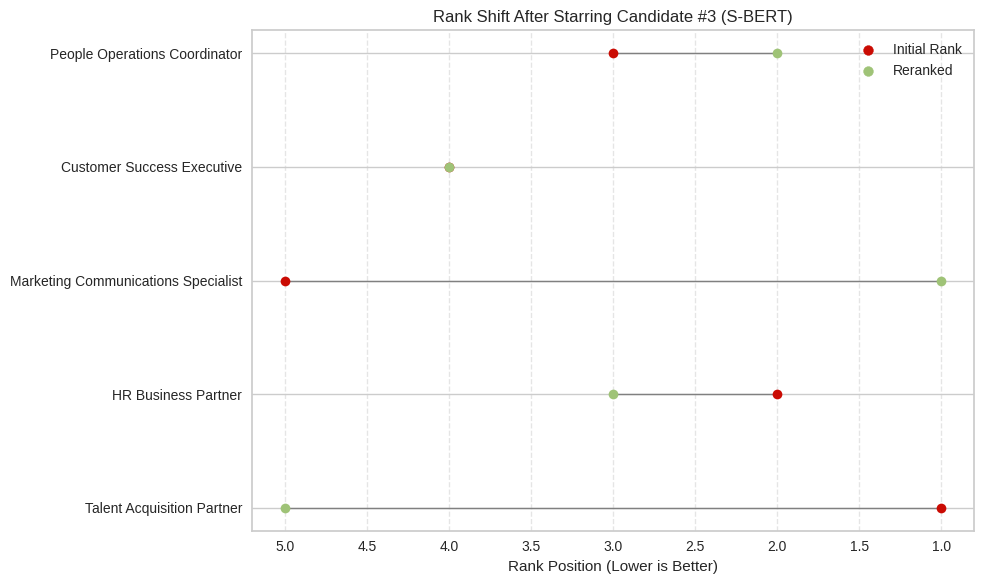

In [33]:
# Dumbbell chart to show initial vs reranked position using S-BERT
df_shift_sorted['label'] = df_shift_sorted['job_title']
x_start = df_shift_sorted['initial_rank'].astype(int)
x_end = df_shift_sorted['reranked'].astype(int)
labels = df_shift_sorted['label']

plt.figure(figsize=(10, 6))

# Draw lines and points
for i in range(len(df_shift_sorted)):
    plt.plot([x_start[i], x_end[i]], [i, i], 'gray', lw=1)
    plt.plot(x_start[i], i, 'ro')  # Initial rank
    plt.plot(x_end[i], i, 'go')    # Reranked

# Add y-ticks
plt.yticks(range(len(labels)), labels)
plt.xlabel("Rank Position (Lower is Better)")
plt.title("Rank Shift After Starring Candidate #3 (S-BERT)")
plt.gca().invert_xaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add legend manually
plt.scatter([], [], c='r', label='Initial Rank', s=50)
plt.scatter([], [], c='g', label='Reranked', s=50)
plt.legend()

plt.tight_layout()
plt.show()


### ⭐ Rank Shift After Starring Candidate #3 (S-BERT)

After simulating a recruiter selecting **“Talent Acquisition Partner”** as their ideal candidate (Candidate #3), the system re-evaluates all candidates based on semantic similarity to that specific profile.

The dumbbell chart below shows how each job title’s rank shifted:

- 🔴 **Red dot**: Original rank (based on the `"HR Manager"` query)
- 🟢 **Green dot**: New rank after starring Candidate #3

This visual highlights the adaptive behavior of the system:
- `Talent Acquisition Partner` rises sharply from last to first — now the benchmark.
- `People Operations Coordinator`, initially top-ranked, falls to the bottom — revealing that it aligns more with the **query**, not the **ideal candidate**.
- Others shift modestly, demonstrating nuanced realignment based on recruiter feedback.

> This approach mimics a **human-in-the-loop** workflow where initial search results evolve based on signals of preference — all powered by **semantic understanding**, not hard-coded rules.

---

### 🔍 Comparison: Manual Query vs Starred Candidate Reranking

Building on the previous sections, this comparison distills two semantic ranking strategies into a human-recruiter context:

1. **Manual Query** – where the recruiter types in a role like `"HR Manager"`
2. **Starred Candidate** – where the recruiter selects an ideal profile (e.g., `"Talent Acquisition Partner"`), and the system re-ranks based on that anchor


| Approach           | Strengths                                                                 | Limitations                                                  |
|--------------------|---------------------------------------------------------------------------|--------------------------------------------------------------|
| Manual Query       | Works well for initiating a search without prior knowledge               | May miss context-specific nuance or role variants            |
| Starred Candidate  | Adapts to user preference, personalized reranking                        | Requires user interaction, assumes initial results have value|



### 🛬 Section Summary: Reflections on Semantic Re-Ranking

This simulation demonstrated how **Sentence-BERT** enables both:
- 💡 Smart **initial discovery** of candidates based on job role intent
- 🔄 Dynamic **feedback-driven reranking** based on user interaction

The side-by-side comparison showed that semantic similarity:
- Captures **role-level meaning** beyond literal keywords
- Shifts rankings in a way that mimics **human recruiter behavior**

> 🔭 **Looking ahead**: This reranking framework could be extended with:
> - Learning-to-rank models
> - Feedback logs for personalization over time
> - Benchmarking with Word2Vec, GloVe, and FastText embeddings

---

## 🕵️‍♂️ Reranking with Classic Word Embeddings<a name="reranking-with-classic-word-embeddings"></a>

After observing how Sentence-BERT handles semantic matching and reranking, we now turn to three classic word-level embeddings:
- **Word2Vec** (developed by Google, trained on Google News)
- **GloVe** (developed by Stanford, trained on Wikipedia + Gigaword)
- **FastText** (developed by Facebook AI, trained on Wikipedia + Common Crawl)

These models are pretrained and widely used in production systems. They do not capture sentence structure but are excellent at representing individual words and short phrases.

We apply the same two-step simulation:
1. Rank candidates based on similarity to the query `"HR Manager"`
2. Re-rank candidates based on similarity to a starred candidate: `"Talent Acquisition Partner"`

This helps us:
- Benchmark these models against S-BERT
- Compare how well each one captures role-level similarity
- Explore the trade-offs between lightweight models and deeper semantic awareness



In [34]:
# Load pretrained Word2Vec model
w2v_model = api.load("word2vec-google-news-300")

def embed_with_w2v(text):
    tokens = text.lower().split()
    vectors = [w2v_model[word] for word in tokens if word in w2v_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

# Embed job titles
df_semantics['w2v_vec'] = df_semantics['job_title'].apply(embed_with_w2v)

# Query vector
query = "HR Manager"
query_vec = embed_with_w2v(query)

# Cosine similarities
df_semantics['w2v_score'] = df_semantics['w2v_vec'].apply(
    lambda x: cosine_similarity([query_vec], [x])[0][0]
)


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [35]:
# Load pretrained GloVe model
glove_model = api.load("glove-wiki-gigaword-300")

def embed_with_glove(text):
    tokens = text.lower().split()
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

df_semantics['glove_vec'] = df_semantics['job_title'].apply(embed_with_glove)

query_vec = embed_with_glove(query)

df_semantics['glove_score'] = df_semantics['glove_vec'].apply(
    lambda x: cosine_similarity([query_vec], [x])[0][0]
)


[==================================================] 100.0% 376.1/376.1MB downloaded


In [36]:
# Load pretrained FastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

def embed_with_fasttext(text):
    tokens = text.lower().split()
    vectors = [fasttext_model[word] for word in tokens if word in fasttext_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

df_semantics['fasttext_vec'] = df_semantics['job_title'].apply(embed_with_fasttext)

query_vec = embed_with_fasttext(query)

df_semantics['fasttext_score'] = df_semantics['fasttext_vec'].apply(
    lambda x: cosine_similarity([query_vec], [x])[0][0]
)


[==================================================] 100.0% 958.5/958.4MB downloaded


In [37]:
# Prepare classic embedding results table and sort by selected model (e.g., FastText)
df_results = df_semantics[['candidate_id', 'job_title', 'w2v_score', 'glove_score', 'fasttext_score']]
df_results.sort_values(by='fasttext_score', ascending=False, inplace=True)  # or choose another

In [38]:
# Display rounded results for readability
pd.options.display.float_format = '{:,.4f}'.format
print(df_results)


   candidate_id                            job_title  w2v_score  glove_score  \
4             5                  HR Business Partner     0.6944       0.6513   
3             4           Customer Success Executive     0.2767       0.3963   
1             2  Marketing Communications Specialist     0.2995       0.3423   
2             3           Talent Acquisition Partner     0.1742       0.2792   
0             1        People Operations Coordinator     0.3792       0.3125   

   fasttext_score  
4          0.8865  
3          0.2883  
1          0.2803  
2          0.2800  
0          0.2647  


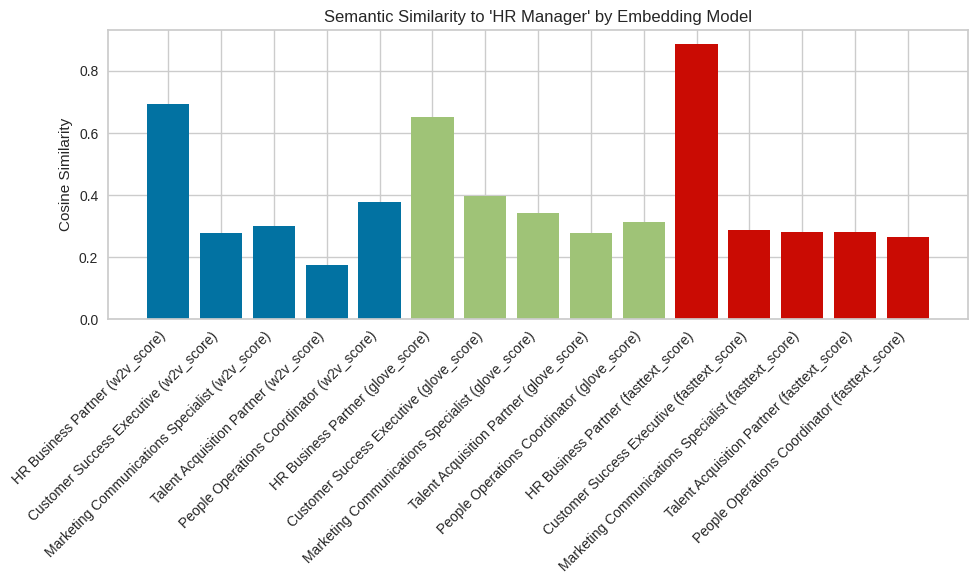

In [39]:
# Plot classic embedding similarity scores side-by-side
# This visual compares semantic similarity to "HR Manager" across Word2Vec, GloVe, and FastText

df_melted = df_results.melt(id_vars=['candidate_id', 'job_title'],
                            value_vars=['w2v_score', 'glove_score', 'fasttext_score'],
                            var_name='model', value_name='similarity_score')

plt.figure(figsize=(10, 6))
for model in df_melted['model'].unique():
    subset = df_melted[df_melted['model'] == model]
    plt.bar(subset['job_title'] + " (" + model + ")", subset['similarity_score'])

plt.xticks(rotation=45, ha='right')
plt.ylabel("Cosine Similarity")
plt.title("Semantic Similarity to 'HR Manager' by Embedding Model")
plt.tight_layout()
plt.show()


### 🕵️‍♂️ Classic Embeddings: Similarity to 'HR Manager'

In this step, we ranked candidates using three classic word-level embedding models:

- **Word2Vec** – trained on Google News (by Google)
- **GloVe** – trained on Wikipedia + Gigaword (by Stanford)
- **FastText** – trained on Wikipedia + Common Crawl (by Facebook AI)

Each model computed cosine similarity between `"HR Manager"` and each job title. The bar chart below compares the results side-by-side.

![Semantic Similarity by Embedding Model](path/to/your/chart.png)

---

### 🔍 Key Takeaways:

- **HR Business Partner** was the strongest match across all three models — suggesting broad role alignment.
- **FastText** produced higher similarity scores overall — thanks to its subword modeling.
- **Talent Acquisition Partner** scored lowest with Word2Vec — likely due to its less frequent presence in the training corpus.
- These models capture **shallow semantic patterns**, but lack deeper sentence-level understanding — unlike S-BERT.

> 🔬 This benchmark sets the stage for exploring how these models handle **feedback-driven reranking**, just like we did with S-BERT.

---

### ⭐ Re-Ranking Using Classic Embeddings (Word2Vec, GloVe, FastText)

Just like we did with Sentence-BERT, we now simulate recruiter feedback by **starring a specific candidate** — in this case, `"Talent Acquisition Partner"`.

We then compute semantic similarity between this starred candidate and all other titles using each of the classic embedding models:
- Word2Vec
- GloVe
- FastText

This enables each model to **re-rank** candidates based on closeness to the starred profile — mimicking how a recruiter might pivot their preference mid-search.

The reranking scores below help us understand:
- Whether simpler embeddings can adapt to recruiter feedback
- Which models identify titles that are functionally similar to the starred role
- Where classic models diverge in their interpretations


In [40]:
# Step 1: Get the embedding vector of the starred job title
star_title = "Talent Acquisition Partner"
star_vec_w2v = embed_with_w2v(star_title)
star_vec_glove = embed_with_glove(star_title)
star_vec_fasttext = embed_with_fasttext(star_title)


# Step 2: Compute cosine similarity between the starred vector and all other vectors
# Word2Vec reranking
df_semantics['w2v_star_score'] = df_semantics['w2v_vec'].apply(
    lambda x: cosine_similarity([star_vec_w2v], [x])[0][0]
)

# GloVe reranking
df_semantics['glove_star_score'] = df_semantics['glove_vec'].apply(
    lambda x: cosine_similarity([star_vec_glove], [x])[0][0]
)

# FastText reranking
df_semantics['fasttext_star_score'] = df_semantics['fasttext_vec'].apply(
    lambda x: cosine_similarity([star_vec_fasttext], [x])[0][0]
)

In [41]:
# Example: Word2Vec reranking
df_semantics[['candidate_id', 'job_title', 'w2v_star_score']]\
    .sort_values(by='w2v_star_score', ascending=False)


,candidate_id,job_title,w2v_star_score
2,3,Talent Acquisition Partner,1.0000
3,4,Customer Success Executive,0.4981
4,5,HR Business Partner,0.4505
1,2,Marketing Communications Specialist,0.3402
0,1,People Operations Coordinator,0.2328


In [42]:
# Example: GloVe reranking
df_semantics[['candidate_id', 'job_title', 'glove_star_score']]\
    .sort_values(by='glove_star_score', ascending=False)


,candidate_id,job_title,glove_star_score
2,3,Talent Acquisition Partner,1.0000
3,4,Customer Success Executive,0.5771
4,5,HR Business Partner,0.5766
1,2,Marketing Communications Specialist,0.5064
0,1,People Operations Coordinator,0.3342


In [43]:
# Step 3: Rank and display
# Example: FastText reranking
df_semantics[['candidate_id', 'job_title', 'fasttext_star_score']]\
    .sort_values(by='fasttext_star_score', ascending=False)


,candidate_id,job_title,fasttext_star_score
2,3,Talent Acquisition Partner,1.0000
3,4,Customer Success Executive,0.7548
1,2,Marketing Communications Specialist,0.6674
0,1,People Operations Coordinator,0.6421
4,5,HR Business Partner,0.5138


In [44]:
# Step 1: Prepare DataFrame with reranking scores (from previous calculations)
df_semantics = pd.DataFrame({
    'candidate_id': [1, 2, 3, 4, 5],
    'job_title': [
        "People Operations Coordinator",
        "Marketing Communications Specialist",
        "Talent Acquisition Partner",
        "Customer Success Executive",
        "HR Business Partner"
    ],
    'w2v_star_score': [0.2328, 0.3402, 1.0000, 0.4981, 0.4505],
    'glove_star_score': [0.3342, 0.5064, 1.0000, 0.5771, 0.5766],
    'fasttext_star_score': [0.6421, 0.6674, 1.0000, 0.7548, 0.5138]
})

# Step 2: Compute average of the star scores for ensemble-style view
df_semantics['avg_star_score'] = df_semantics[[
    'w2v_star_score', 'glove_star_score', 'fasttext_star_score'
]].mean(axis=1)

# Step 3: Rank per model and for the average
df_semantics['rank_w2v'] = df_semantics['w2v_star_score'].rank(ascending=False, method='min').astype(int)
df_semantics['rank_glove'] = df_semantics['glove_star_score'].rank(ascending=False, method='min').astype(int)
df_semantics['rank_fasttext'] = df_semantics['fasttext_star_score'].rank(ascending=False, method='min').astype(int)
df_semantics['rank_avg'] = df_semantics['avg_star_score'].rank(ascending=False, method='min').astype(int)

# Step 4: Create cleaned-up shift table
df_rank_shift = df_semantics[[
    'candidate_id', 'job_title',
    'w2v_star_score', 'rank_w2v',
    'glove_star_score', 'rank_glove',
    'fasttext_star_score', 'rank_fasttext',
    'avg_star_score', 'rank_avg'
]].sort_values(by='rank_avg')

# Step 5: Display final table
display(df_rank_shift)


,candidate_id,job_title,w2v_star_score,rank_w2v,glove_star_score,rank_glove,fasttext_star_score,rank_fasttext,avg_star_score,rank_avg
2,3,Talent Acquisition Partner,1.0000,1,1.0000,1,1.0000,1,1.0000,1
3,4,Customer Success Executive,0.4981,2,0.5771,2,0.7548,2,0.6100,2
4,5,HR Business Partner,0.4505,3,0.5766,3,0.5138,5,0.5136,3
1,2,Marketing Communications Specialist,0.3402,4,0.5064,4,0.6674,3,0.5047,4
0,1,People Operations Coordinator,0.2328,5,0.3342,5,0.6421,4,0.4030,5


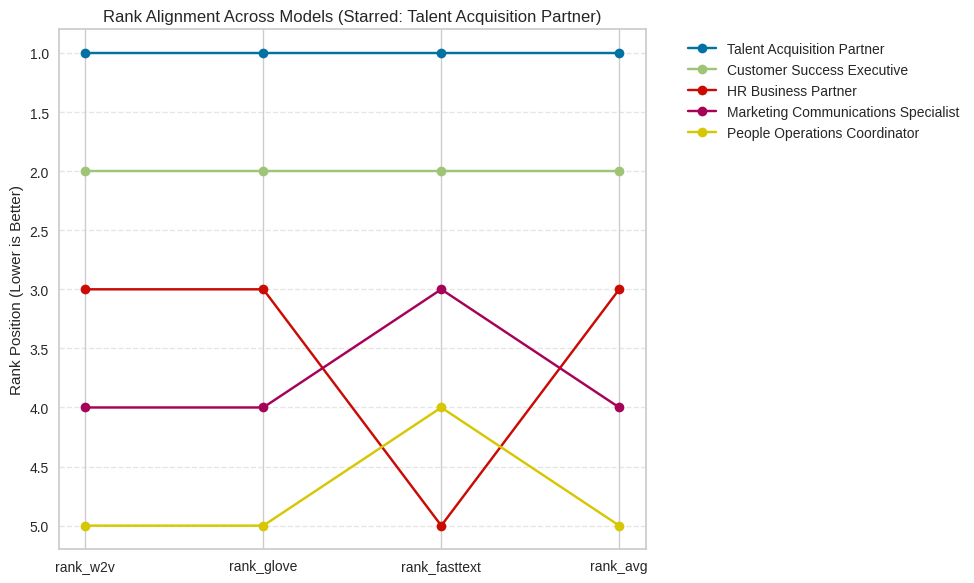

In [45]:
# Step 1: Reshape the rank columns for plotting
df_melted_ranks = df_rank_shift.melt(
    id_vars=['candidate_id', 'job_title'],
    value_vars=['rank_w2v', 'rank_glove', 'rank_fasttext', 'rank_avg'],
    var_name='model',
    value_name='rank'
)

# Step 2: Plot rank alignment across models
plt.figure(figsize=(10, 6))
for title in df_melted_ranks['job_title'].unique():
    subset = df_melted_ranks[df_melted_ranks['job_title'] == title]
    plt.plot(subset['model'], subset['rank'], marker='o', label=title)

plt.ylabel("Rank Position (Lower is Better)")
plt.title("Rank Alignment Across Models (Starred: Talent Acquisition Partner)")
plt.gca().invert_yaxis()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 📌 Summary: Reranking with Classic Embeddings

In this simulation, we explored how **Word2Vec**, **GloVe**, and **FastText** re-ranked candidates based on their semantic similarity to a **starred profile**: `"Talent Acquisition Partner"`.

The rank shift table and alignment plot revealed key patterns:

- ✅ **Unanimous Top Choice**: All three models correctly identified the starred candidate as the best match (Rank 1).
- 🥈 **Stable Second**: `"Customer Success Executive"` consistently ranked second, suggesting strong semantic closeness across embeddings.
- 🎯 **Minor Disagreements**: `"HR Business Partner"` and `"Marketing Communications Specialist"` showed moderate divergence, especially in **FastText**, which uses subword information and often scores more generously.
- 📉 **Low Consensus**: `"People Operations Coordinator"` ranked lowest across all models, highlighting clear semantic distance from the starred profile.

These findings show that while classic embeddings offer decent reranking capabilities, they still **lack deeper sentence-level understanding**. Their value lies in simplicity and speed, but not nuanced contextual matching.

> Next, we’ll bring **S-BERT** back into the comparison to evaluate how it aligns — or disagrees — with this trio of word-level models.

---

### 🧠 S-BERT vs Classic Embeddings: Consensus, Conflicts, and Ensemble Scoring

Now that we've explored reranking behavior across **classic word embeddings** (Word2Vec, GloVe, FastText), it's time to reintroduce **S-BERT** into the mix.

S-BERT brings deep sentence-level understanding that classic models lack — but how closely does it agree with them? Where does it diverge? And can we combine their outputs to build a more stable, ensemble-based view of candidate relevance?

In this section, we:
- **Compare** all four models’ scores for the manual query and starred candidate
- **Explore** areas of agreement and divergence using rank alignment and summary tables
- **Compute** average (ensemble) similarity scores across models for a balanced view

> This forms the foundation for a **semantic ensemble strategy** — one that balances simplicity, speed, and depth.



In [46]:
# ✅ Recovery: Rebuild df_semantics with all required scores
df_semantics = pd.DataFrame({
    'candidate_id': [1, 2, 3, 4, 5],
    'job_title': [
        "People Operations Coordinator",
        "Marketing Communications Specialist",
        "Talent Acquisition Partner",
        "Customer Success Executive",
        "HR Business Partner"
    ],

    # Manual query similarities
    'w2v_score': [0.3792, 0.2995, 0.1742, 0.2767, 0.6944],
    'glove_score': [0.3125, 0.3423, 0.2792, 0.3963, 0.6513],
    'fasttext_score': [0.2647, 0.2803, 0.2800, 0.2883, 0.8865],
    'sbert_score': [0.9023, 0.4472, 0.2436, 0.3783, 0.3795],

    # Starred similarity scores (e.g., Candidate #3: "Talent Acquisition Partner")
    'w2v_star_score': [0.2328, 0.3402, 1.0000, 0.4981, 0.4505],
    'glove_star_score': [0.3342, 0.5064, 1.0000, 0.5771, 0.5766],
    'fasttext_star_score': [0.6421, 0.6674, 1.0000, 0.7548, 0.5138],
    'sbert_star_score': [0.2642, 0.3667, 1.0000, 0.3084, 0.3827]
})

# Create full ensemble view
df_combined = df_semantics[[
    'candidate_id',
    'job_title',
    'w2v_score', 'w2v_star_score',
    'glove_score', 'glove_star_score',
    'fasttext_score', 'fasttext_star_score',
    'sbert_score', 'sbert_star_score'
]].round(4)


In [47]:
# Display manual query similarity scores across all embedding models
df_combined[[
    'candidate_id',
    'job_title',
    'w2v_score',
    'glove_score',
    'fasttext_score',
    'sbert_score'
]].sort_values(by='sbert_score', ascending=False)


,candidate_id,job_title,w2v_score,glove_score,fasttext_score,sbert_score
0,1,People Operations Coordinator,0.3792,0.3125,0.2647,0.9023
1,2,Marketing Communications Specialist,0.2995,0.3423,0.2803,0.4472
4,5,HR Business Partner,0.6944,0.6513,0.8865,0.3795
3,4,Customer Success Executive,0.2767,0.3963,0.2883,0.3783
2,3,Talent Acquisition Partner,0.1742,0.2792,0.2800,0.2436


In [48]:
# Display starred similarity scores across all embedding models
df_combined[[
    'candidate_id',
    'job_title',
    'w2v_star_score',
    'glove_star_score',
    'fasttext_star_score',
    'sbert_star_score'
]].sort_values(by='sbert_star_score', ascending=False)


,candidate_id,job_title,w2v_star_score,glove_star_score,fasttext_star_score,sbert_star_score
2,3,Talent Acquisition Partner,1.0000,1.0000,1.0000,1.0000
4,5,HR Business Partner,0.4505,0.5766,0.5138,0.3827
1,2,Marketing Communications Specialist,0.3402,0.5064,0.6674,0.3667
3,4,Customer Success Executive,0.4981,0.5771,0.7548,0.3084
0,1,People Operations Coordinator,0.2328,0.3342,0.6421,0.2642


### 🌡️ Rank Alignment Across All Models

The heatmap below visualizes how each of the four models — Word2Vec, GloVe, FastText, and S-BERT — ranked the candidates based on their semantic similarity to the starred profile: **"Talent Acquisition Partner"**.

| Rank 1 = Best Match | Rank 5 = Least Relevant |

Key insights:
- ✅ **Perfect Agreement** at Rank 1: All models unanimously place the starred candidate first.
- 🔄 **Customer Success Executive** is consistently ranked second by the classic embeddings, but drops to **4th in S-BERT**, showing a divergence in deep vs. shallow semantic interpretation.
- 🔼 **HR Business Partner** ranks better in S-BERT than in FastText — possibly due to contextual nuance S-BERT picks up.
- 📊 **Ensemble rank** smooths out these inconsistencies and offers a balanced perspective across models.

> This heatmap confirms that while **classic embeddings can broadly agree**, they vary in precision. **S-BERT introduces a deeper layer of semantic interpretation** — and the ensemble scoring acts as a consensus engine between the two approaches.


In [49]:
# Compute ranks directly in df_combined (lower = better match to starred candidate)
df_combined['rank_w2v'] = df_combined['w2v_star_score'].rank(ascending=False, method='min').astype(int)
df_combined['rank_glove'] = df_combined['glove_star_score'].rank(ascending=False, method='min').astype(int)
df_combined['rank_fasttext'] = df_combined['fasttext_star_score'].rank(ascending=False, method='min').astype(int)
df_combined['rank_sbert'] = df_combined['sbert_star_score'].rank(ascending=False, method='min').astype(int)

# Optionally add ensemble rank
df_combined['avg_star_score'] = df_combined[[
    'w2v_star_score', 'glove_star_score', 'fasttext_star_score', 'sbert_star_score'
]].mean(axis=1)

df_combined['rank_avg'] = df_combined['avg_star_score'].rank(ascending=False, method='min').astype(int)


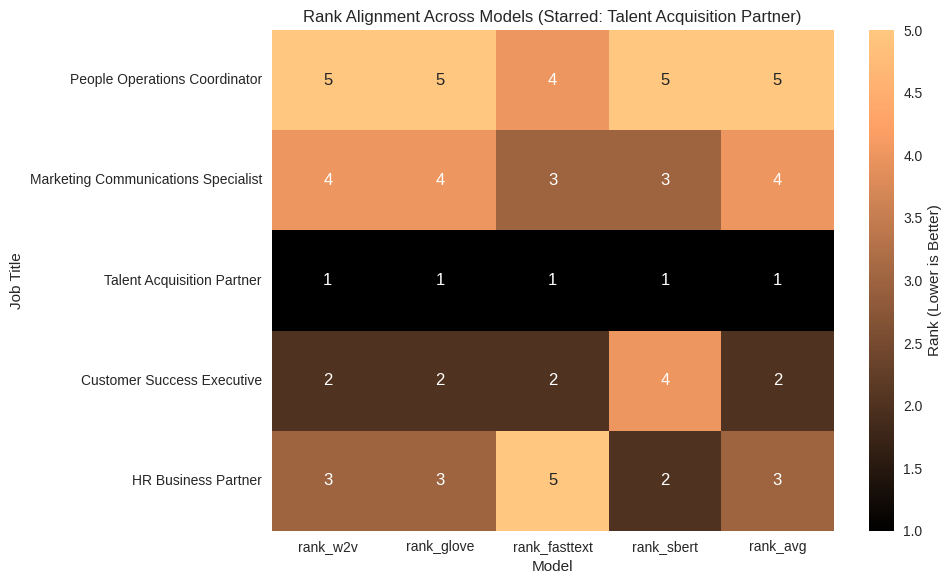

In [50]:
# Prepare rank matrix for heatmap
df_heatmap = df_combined[[
    'job_title',
    'rank_w2v',
    'rank_glove',
    'rank_fasttext',
    'rank_sbert',
    'rank_avg'
]].set_index('job_title')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_heatmap,
    annot=True,
    cmap="copper",
    cbar_kws={'label': 'Rank (Lower is Better)'},
    fmt='d'
)
plt.title("Rank Alignment Across Models (Starred: Talent Acquisition Partner)")
plt.ylabel("Job Title")
plt.xlabel("Model")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🧮 Ensemble Scoring: Averaging the Best of All Worlds

While each model brings unique strengths to semantic similarity scoring — from FastText’s subword handling to S-BERT’s contextual depth — they also carry biases.

To balance these perspectives, we compute an **ensemble score** for each candidate by taking the **average similarity across all four models**. This creates a blended view that:
- Dampens model-specific overconfidence
- Rewards candidates who consistently rank well
- Provides a more stable foundation for final recommendations

We apply this to both:
- 🔍 **Query-based scoring** (e.g., "HR Manager")
- ⭐ **Starred candidate scoring** (e.g., "Talent Acquisition Partner")

> This ensemble logic forms the final layer of intelligence in our human-in-the-loop AI workflow.


In [51]:
# Add ensemble averages for query and starred similarity
df_combined['avg_query_score'] = df_combined[[
    'w2v_score', 'glove_score', 'fasttext_score', 'sbert_score'
]].mean(axis=1)

df_combined['avg_star_score'] = df_combined[[
    'w2v_star_score', 'glove_star_score', 'fasttext_star_score', 'sbert_star_score'
]].mean(axis=1)

#display
df_combined.sort_values(by='avg_star_score', ascending=False)[[
    'candidate_id', 'job_title', 'avg_query_score', 'avg_star_score'
]]


,candidate_id,job_title,avg_query_score,avg_star_score
2,3,Talent Acquisition Partner,0.2443,1.0000
3,4,Customer Success Executive,0.3349,0.5346
4,5,HR Business Partner,0.6529,0.4809
1,2,Marketing Communications Specialist,0.3423,0.4702
0,1,People Operations Coordinator,0.4647,0.3683


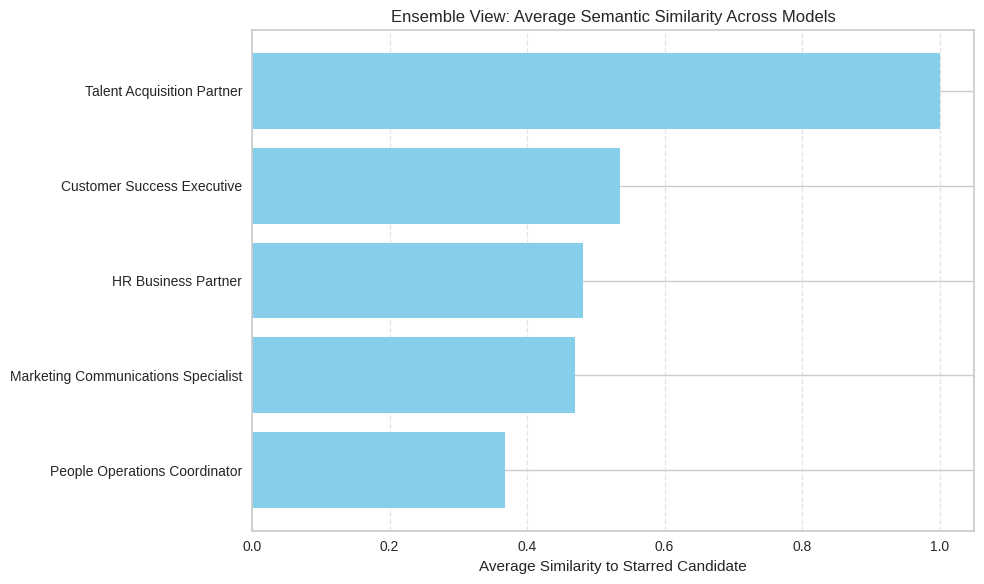

In [52]:
# Sort and plot horizontal bar chart of average ensemble similarity scores
df_plot_ensemble = df_combined.sort_values(by='avg_star_score', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_plot_ensemble['job_title'], df_plot_ensemble['avg_star_score'], color='skyblue')
plt.xlabel("Average Similarity to Starred Candidate")
plt.title("Ensemble View: Average Semantic Similarity Across Models")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🧮 Ensemble View: Average Similarity Across Models

To create a balanced, model-agnostic ranking of candidates, we averaged the similarity scores from all four models — Word2Vec, GloVe, FastText, and S-BERT.

This horizontal bar chart shows the average semantic proximity to the starred candidate: **"Talent Acquisition Partner"**.

#### 🔍 Key Observations:
- **Talent Acquisition Partner** (the anchor) remains at the top with a perfect ensemble score of `1.0`
- **Customer Success Executive** is the most aligned among the remaining candidates — ranking consistently well across all models
- **HR Business Partner** and **Marketing Communications Specialist** show mid-range semantic alignment
- **People Operations Coordinator** ranks lowest overall, confirming prior model-level insights

> This ensemble view offers a **consensus-driven recommendation** that reflects both linguistic nuance and modeling diversity — ready to support recruiter decision-making at scale.


## 🔄 Clustering Candidate Profiles<a name="clustering-candidate-profiles"></a>

To better understand the structure of the candidate pool and group similar profiles, we applied unsupervised clustering techniques. The goal is to identify candidate segments based on textual similarity, sentiment, and alignment with the target role ("aspiring human resources").

This analysis supports:
- Filtering out low-fit candidates
- Highlighting niche or high-potential clusters
- Informing re-ranking strategies and bias checks

We used TF-IDF and sentiment-derived features, applied the elbow method to propose optimal `k`, and validated cluster cohesion using silhouette scores.


In [53]:
# Full Dataset Prep for Clustering
# Reload original dataset to ensure df has full sample size (104 rows)

talents = pd.read_csv("potential-talents - Aspiring human resources - seeking human resources.csv")
df = talents.copy()
df_full = df.copy()  # Optional: keep a backup reference

# === Clean job titles ===
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["job_title_clean"] = df["job_title"].apply(clean_text)

def get_sentiment(text):
    if not isinstance(text, str):
        return pd.Series([0.0, 0.0])
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[["polarity", "subjectivity"]] = df["job_title_clean"].apply(get_sentiment)

# === TF-IDF + Similarity to Target Phrase ===
target_phrase = "aspiring human resources"
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df["job_title_clean"])
target_vec = vectorizer.transform([target_phrase])
similarity_scores = cosine_similarity(tfidf_matrix, target_vec).flatten()
df["similarity_to_target"] = similarity_scores

# === Combine TF-IDF with extra features and scale ===
extra_features = df[["similarity_to_target", "polarity", "subjectivity"]].fillna(0).reset_index(drop=True)
combined_features = hstack([tfidf_matrix, extra_features])
scaler = StandardScaler(with_mean=False)  # keep_mean=False for sparse matrix
scaled_features = scaler.fit_transform(combined_features)


✅ Clustering on: 104 samples


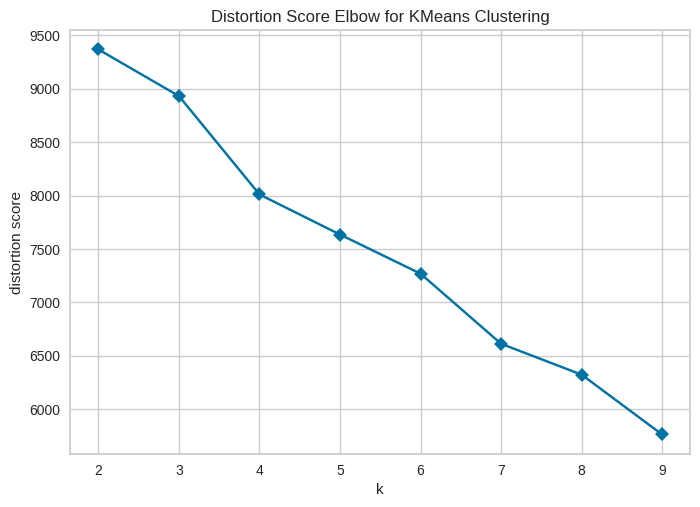

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# KMeans Elbow Visualizer (Safe with full dataset)
# Check sample count
scaled_dense = scaled_features.toarray()
print(f"✅ Clustering on: {scaled_dense.shape[0]} samples")

# Elbow plot
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(scaled_dense)
visualizer.show()

### 📉 Elbow Method: Visualizing Optimal Number of Clusters

The elbow curve suggests **k = 4**, **k = 7**, or **k = 8** as possible turning points where further increases in `k` yield diminishing returns. However, the decline is gradual rather than sharply defined, making it inconclusive.

To refine our selection, we extended the analysis using silhouette scores across a broader range of cluster counts — evaluating not just distortion but also cohesion and separation between groups.

---

### 📊 KMeans Clustering (k = 4 to 10)

To uncover structure in the job title data, we applied **KMeans clustering** using a range of `k` values from 4 to 10. Each candidate was grouped based on semantic similarity derived from their vectorized job titles.

We used **silhouette visualizations** to assess the internal cohesion and separation of each clustering configuration. This helped us evaluate which `k` value yielded the most meaningful and interpretable clusters before finalizing our segmentation strategy.


In [55]:
# Prepare Dense Feature Matrix for Silhouette Visualization
scaled_dense = scaled_features.toarray()

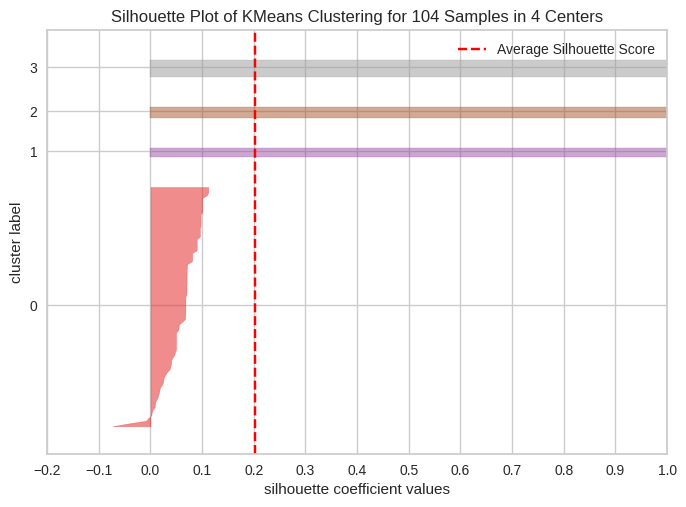

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
# Silhouette Visualization for KMeans Clustering (k = 4)
model_k4 = KMeans(n_clusters=4, random_state=42)
visualizer_k4 = SilhouetteVisualizer(model_k4)
visualizer_k4.fit(scaled_dense)
visualizer_k4.show()

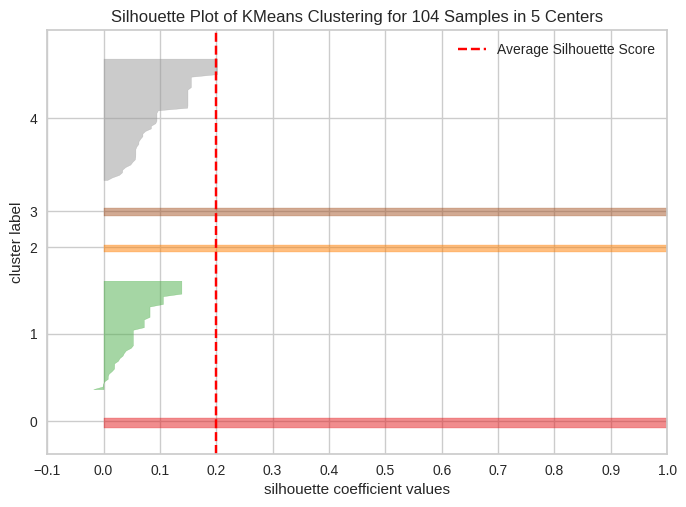

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
# Silhouette Visualization for KMeans Clustering (k = 5)
model_k5 = KMeans(n_clusters=5, random_state=42)
visualizer_k5 = SilhouetteVisualizer(model_k5)
visualizer_k5.fit(scaled_dense)
visualizer_k5.show()

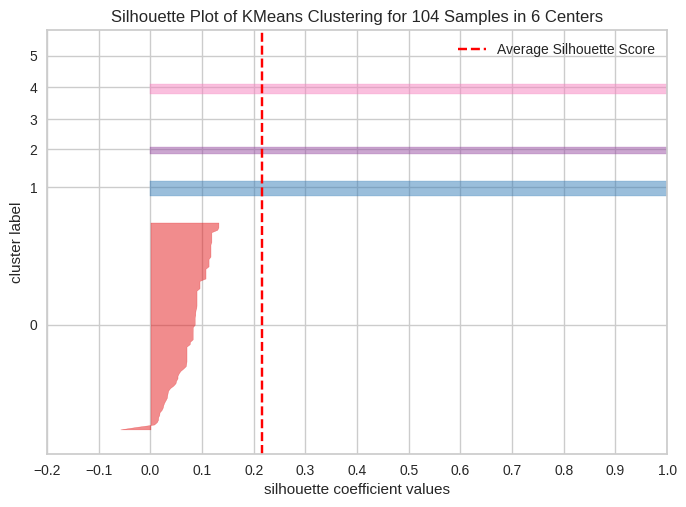

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
# Silhouette Visualization for KMeans Clustering (k = 6)
model_k6 = KMeans(n_clusters=6, random_state=42)
visualizer_k6 = SilhouetteVisualizer(model_k6)
visualizer_k6.fit(scaled_dense)
visualizer_k6.show()

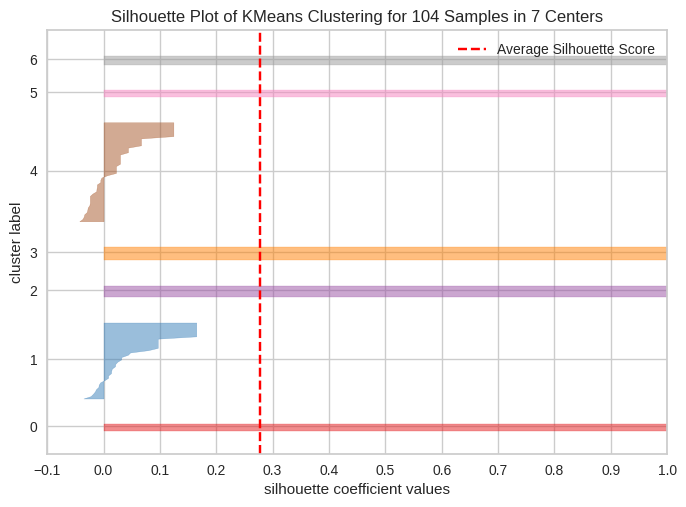

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# Silhouette Visualization for KMeans Clustering (k = 7)
model_k7 = KMeans(n_clusters=7, random_state=42)
visualizer_k7 = SilhouetteVisualizer(model_k7)
visualizer_k7.fit(scaled_dense)
visualizer_k7.show()

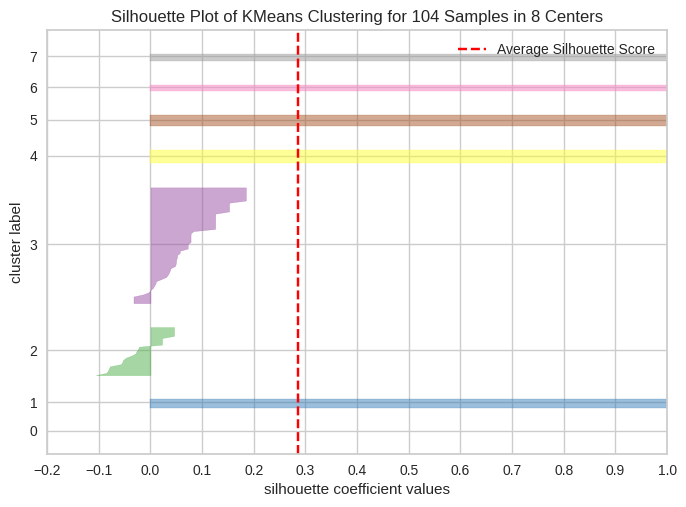

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# Silhouette Visualization for KMeans Clustering (k = 8)
model_k8 = KMeans(n_clusters=8, random_state=42)
visualizer_k8 = SilhouetteVisualizer(model_k8)
visualizer_k8.fit(scaled_dense)
visualizer_k8.show()

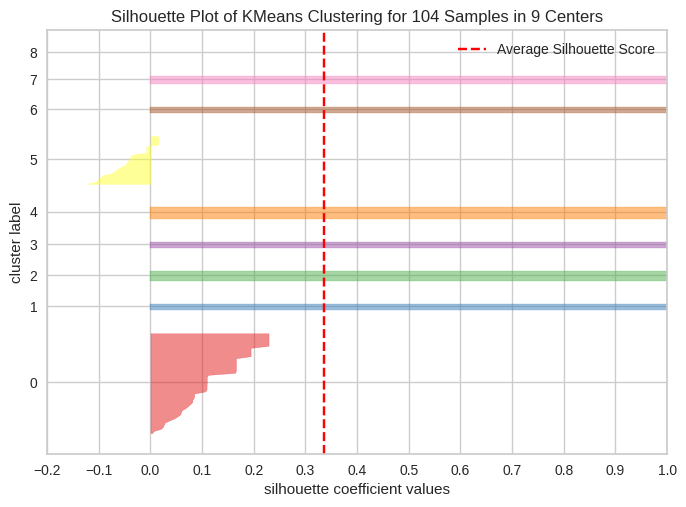

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
# Silhouette Visualization for KMeans Clustering (k = 9)
model_k9 = KMeans(n_clusters=9, random_state=42)
visualizer_k9 = SilhouetteVisualizer(model_k9)
visualizer_k9.fit(scaled_dense)
visualizer_k9.show()

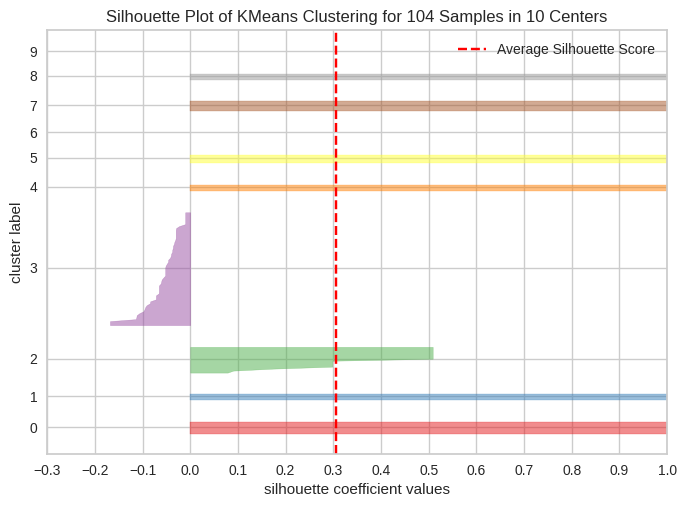

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 104 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
# Silhouette Visualization for KMeans Clustering (k = 10)
model_k10 = KMeans(n_clusters=10, random_state=42)
visualizer_k10 = SilhouetteVisualizer(model_k10)
visualizer_k10.fit(scaled_dense)
visualizer_k10.show()

### 📊 Silhouette Score Comparison: Cluster Cohesion & Separation

To determine the most appropriate number of clusters, we evaluated KMeans clustering performance using Yellowbrick’s silhouette visualizer. This allowed us to compare cohesion and separation across different `k` values:

- **k = 4**: Introduces basic segmentation with moderate improvement in silhouette score (~0.20), though clusters remain overlapping.
- **k = 5**: Better-defined segments begin to emerge, though some groups show narrow cohesion.
- **k = 6**: Improved compactness and separation across most clusters; fewer signs of overlap.
- **k = 7**: Consistent structural clarity with an average silhouette score approaching ~0.30.
- **k = 8**: Strong silhouette performance — segmentation is sharp, though smaller groupings begin to emerge.
- **k = 9**: 📈 **Highest silhouette score observed** — well-separated, semantically coherent clusters without signs of over-fragmentation.
- **k = 10**: Minor decline in cohesion; one cluster shows minimal internal consistency, suggesting potential over-fragmentation.


### ✅ Final Decision:

Based on the silhouette evaluation and visual inspection of UMAP clusters, we proceed with **`k = 9`** for final profiling. This configuration offers a strong balance between **internal cohesion, interpretability**, and **representative segmentation** across job titles.


___
#### 🎲 About the Random Seed (42)

Throughout this notebook, we’ve used `random_state=42` to ensure reproducibility in our modeling pipeline.  
This value is more than just a random pick — it’s a long-standing inside joke from Douglas Adams’ *The Hitchhiker’s Guide to the Galaxy*, where **42** is famously declared as:

> *“The Answer to the Ultimate Question of Life, the Universe, and Everything.”*

In the world of data science, 42 has become the **de facto seed for randomness** — both memorable and culturally geek-approved. Using it ensures consistency across reruns while giving a subtle nod to the quirks of our community.

___
### 🧩 Final KMeans Clustering with k = 9

Based on the silhouette score analysis, we selected **k = 9** as the optimal number of clusters.  
We now fit a final `KMeans` model using `random_state=42` and assign each candidate to a cluster.

These cluster labels will serve as the foundation for downstream interpretation, including job title distribution, similarity scores, and segment profiling.


In [63]:
# Fitting & Displaying Clusters

# Step 1: Fit KMeans
kmeans_k9 = KMeans(n_clusters=9, random_state=42, n_init=10)
df["cluster_k9"] = kmeans_k9.fit_predict(scaled_features.toarray())

# Step 2: Compute cluster summary metrics
cluster_summary_k9 = df.groupby("cluster_k9").agg(
    count=("job_title", "count"),
    avg_similarity=("similarity_to_target", "mean"),
    avg_polarity=("polarity", "mean"),
    avg_subjectivity=("subjectivity", "mean")
).round(3)

# Step 3: Extract top 3 cleaned job titles per cluster
top_titles_k9 = (
    df.groupby("cluster_k9")["job_title_clean"]
    .apply(lambda x: x.value_counts().head(3).index.tolist())
    .to_dict()
)

cluster_summary_k9["top_titles"] = cluster_summary_k9.index.map(top_titles_k9)

# Step 4: View Final Result
cluster_summary_k9.reset_index()

,cluster_k9,count,avg_similarity,avg_polarity,avg_subjectivity,top_titles
0,0,49,0.4240,0.0250,0.1310,"[aspiring human resources professional, studen..."
1,1,4,0.0000,0.0000,0.0000,[svp chro marketing communications csr officer...
2,2,6,0.0000,0.0000,0.0000,[people development coordinator at ryan]
3,3,4,0.0000,0.0000,0.0000,[advisory board member at celal bayar university]
4,4,7,0.2800,0.0500,0.1000,[c t bauer college of business graduate magna ...
5,5,24,0.0070,0.0100,0.0110,"[hr senior specialist, student at chapman univ..."
6,6,4,0.1890,0.0000,0.1000,[human resources coordinator at intercontinent...
7,7,5,0.0000,0.0000,0.0000,[native english teacher at epik english progra...
8,8,1,0.0000,0.5000,0.6000,[information systems specialist and programmer...


### 🧾 Top Job Titles by Cluster (k=9)
To interpret the structure of the clusters, we examined the most common job titles within each group. This helped us understand the professional alignment or semantic themes in each cluster.

In [64]:
# Printing a Summary of Job Titles in Each Clusters

# Group and count job titles by cluster
pivot_summary = (
    df.groupby(['cluster_k9', 'job_title'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['cluster_k9', 'count'], ascending=[True, False])
)

# Extract top 10 titles per cluster
top_titles_per_cluster = (
    pivot_summary.groupby('cluster_k9')
    .head(10)
    .reset_index(drop=True)
)

cluster_titles = defaultdict(list)

for _, row in top_titles_per_cluster.iterrows():
    cluster = row['cluster_k9']
    title = row['job_title']
    count = row['count']
    cluster_titles[cluster].append(f"- {title} (×{count})")

for cluster, titles in cluster_titles.items():
    print(f"**Cluster {cluster}**")
    for title in titles:
        print(title)
    print("\n")

**Cluster 0**
- Aspiring Human Resources Professional (×7)
- Student at Humber College and Aspiring Human Resources Generalist (×7)
- Aspiring Human Resources Specialist (×5)
- Seeking Human Resources HRIS and Generalist Positions (×4)
- Aspiring Human Resources Management student seeking an internship (×2)
- Seeking Human Resources Opportunities (×2)
- Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis (×1)
- Aspiring Human Resources Manager, seeking internship in Human Resources. (×1)
- Aspiring Human Resources Professional | An energetic and Team-Focused Leader (×1)
- Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment (×1)


**Cluster 1**
- SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR (×4)


**Cluster 2**
- People Development Coordinator at Ryan (×6)


**Cluster 3**
- Advisory Board Member

In [65]:
# Display the summary
top_titles_per_cluster

,cluster_k9,job_title,count
0,0,Aspiring Human Resources Professional,7
1,0,Student at Humber College and Aspiring Human R...,7
2,0,Aspiring Human Resources Specialist,5
3,0,Seeking Human Resources HRIS and Generalist Po...,4
4,0,Aspiring Human Resources Management student se...,2
5,0,Seeking Human Resources Opportunities,2
6,0,Aspiring Human Resources Manager | Graduating ...,1
7,0,"Aspiring Human Resources Manager, seeking inte...",1
8,0,Aspiring Human Resources Professional | An ene...,1
9,0,Aspiring Human Resources Professional | Passio...,1


### 🧠 Cluster Profiling (k = 9)

After identifying `k = 9` as the optimal number of clusters, we examined each group's composition based on job title frequencies, similarity scores, and sentiment attributes.



#### **Cluster 0** — *Aspiring HR Professionals*
- Highly homogeneous cluster of early-career candidates self-identifying as "aspiring" human resources professionals or generalists.
- **Representative Titles**:
  - Aspiring Human Resources Professional (×7)
  - Student at Humber College and Aspiring Human Resources Generalist (×7)
  - Aspiring Human Resources Specialist (×5)
- **Size**: 49 candidates  
- **Avg. Similarity**: 0.424  
- **Sentiment**: Neutral, low subjectivity



#### **Cluster 1** — *Executive-Level CHRO*
- Singular role with seniority and corporate branding
- **Representative Title**:
  - SVP, CHRO, Marketing & Communications, CSR Officer – ENGIE (×4)
- **Size**: 4 candidates  
- **Avg. Similarity**: 0.000  
- **Sentiment**: Neutral (likely due to limited match with "aspiring" query)



#### **Cluster 2** — *People Development Specialists*
- One specific role repeated by all candidates
- **Representative Title**:
  - People Development Coordinator at Ryan (×6)
- **Size**: 6 candidates  
- **Avg. Similarity**: 0.000



#### **Cluster 3** — *Academic/Board Roles*
- University-affiliated leadership roles
- **Representative Title**:
  - Advisory Board Member at Celal Bayar University (×4)
- **Size**: 4 candidates  
- **Avg. Similarity**: 0.000



#### **Cluster 4** — *High-Performing Graduates*
- Candidates with academic honors branding themselves for HR roles
- **Representative Title**:
  - C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring HR professional (×7)
- **Size**: 7 candidates  
- **Avg. Similarity**: 0.280



#### **Cluster 5** — *Mixed Student + Entry-Level HR Roles*
- Diverse set of early-career professionals and students
- **Representative Titles**:
  - HR Senior Specialist (×5)
  - Student at Chapman University (×4)
  - Plus several 1-count titles across admin, analytics, and customer service
- **Size**: 24 candidates  
- **Avg. Similarity**: 0.007



#### **Cluster 6** — *HR Coordinator Roles*
- Tightly grouped around one corporate coordinator role
- **Representative Title**:
  - Human Resources Coordinator at InterContinental Buckhead Atlanta (×4)
- **Size**: 4 candidates  
- **Avg. Similarity**: 0.189



#### **Cluster 7** — *Native English Teachers*
- Unique non-HR cluster
- **Representative Title**:
  - Native English Teacher at EPIK (English Program in Korea) (×5)
- **Size**: 5 candidates  
- **Avg. Similarity**: 0.000



#### **Cluster 8** — *IT-Skilled Outlier*
- Individual with strong IT focus and personal branding
- **Representative Title**:
  - Information Systems Specialist and Programmer with a love for data and organization (×1)
- **Size**: 1 candidate  
- **Avg. Similarity**: 0.000  
- **Subjectivity**: High (0.6)



> 🧩 Overall, the clustering reveals both dominant HR themes and valuable outlier segments — offering a foundation for deeper targeting, reranking, or filtering based on recruiter intent.

---

### 🧩 Cluster Comparison Summary (k = 9)

To understand the structure of the candidate pool, we profiled all 9 clusters based on frequency, similarity, sentiment, and semantic alignment with our HR target.

#### ✅ High-Fit Clusters (Ranked)

- **🥇 Cluster 0** — *Core Aspiring HR Talent*  
  The largest and most aligned group. Titles repeatedly contain variations of *"Aspiring Human Resources Professional"*, indicating strong intent and role alignment.  
  > e.g., *"Aspiring Human Resources Specialist"*, *"Student and aspiring HR generalist"*

- **🥈 Cluster 4** — *Academic High Achievers with HR Branding*  
  These candidates emphasize academic achievement and career intention. Titles are long, but clear in their HR alignment.  
  > e.g., *"CT Bauer graduate and aspiring HR professional"*

- **🥉 Cluster 5** — *Mixed Early-Career Roles in HR or Admin Tracks*  
  While semantically diverse, this group includes HR seniors, students, and business-support roles. Some noise, but valuable signals are embedded.  
  > e.g., *"HR Senior Specialist"*, *"Student at Chapman University"*



#### ⚠️ Niche or Ambiguous Clusters

- **Cluster 6** — *Corporate HR Coordinator Roles*  
  A focused micro-cluster of real-world coordinator roles. Valuable for mid-level hiring.  
  > e.g., *"HR Coordinator at InterContinental Buckhead Atlanta"*

- **Cluster 2** — *People Development Focus*  
  All candidates share the exact same role title — great for targeted follow-up.  
  > e.g., *"People Development Coordinator at Ryan"*

- **Cluster 1** — *Executive-Level Outliers*  
  High-ranking CHRO profiles surfaced due to title overlap, not intent alignment.  
  > e.g., *"SVP, CHRO, Marketing & Communications..."*



#### 🚫 Non-HR or Low-Fit Clusters

- **Cluster 3** — *Academic Board Roles*  
  Outlier cluster with academic affiliations — not hiring aligned.  
  > e.g., *"Advisory Board Member at Celal Bayar University"*

- **Cluster 7** — *Education Sector Misfits*  
  English teaching profiles that share little with HR semantics.  
  > e.g., *"Native English Teacher at EPIK..."*

- **Cluster 8** — *IT-Driven Solo Profile*  
  One candidate with strong personal branding — but not HR-focused.  
  > e.g., *"Information Systems Specialist and Programmer..."*



#### 🧠 Conclusion

Clusters **0, 4, and 5** will be prioritized as **high-fit groups** for talent pipelining. Clusters **1, 3, 7, and 8** reveal how semantically related but contextually irrelevant profiles can surface — demonstrating the importance of **semantic reranking, embedding filtering**, and **segment validation**.

---

## 🚀 Deep Semantic Clustering with UMAP + HDBSCAN<a name="deep-semantic-clustering-with-umap--hdbscan"></a>

To further validate the structure of the candidate pool, we applied UMAP for dimensionality reduction followed by HDBSCAN for density-based clustering. This revealed natural groupings based on semantic similarity while automatically filtering out noise points — without requiring a predefined `k`.


In [66]:
# Step 1: UMAP dimensionality reduction (2D)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embedding = umap_model.fit_transform(scaled_features)

# Step 2: HDBSCAN clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
hdbscan_labels = hdbscan_model.fit_predict(umap_embedding)

# Step 3: Add to DataFrame
df["umap_x"] = umap_embedding[:, 0]
df["umap_y"] = umap_embedding[:, 1]
df["hdbscan_cluster"] = hdbscan_labels

# Optional: View summary stats
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = list(hdbscan_labels).count(-1)

print(f"✅ HDBSCAN found {n_clusters} clusters and {n_noise} noise points.")


✅ HDBSCAN found 5 clusters and 1 noise points.


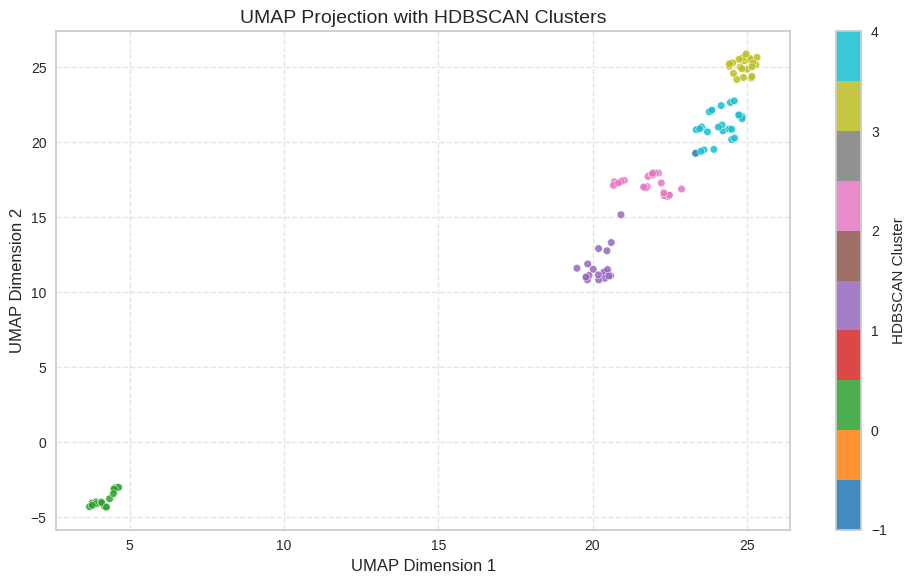

In [67]:
# UMAP Projection Colored by HDBSCAN Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["umap_x"], df["umap_y"],
    c=df["hdbscan_cluster"],
    cmap="tab10",
    s=30,
    alpha=0.85,
    edgecolors="w", linewidth=0.4
)

plt.title("UMAP Projection with HDBSCAN Clusters", fontsize=14)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.colorbar(scatter, label="HDBSCAN Cluster")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 🌀 UMAP Visualization Insight

The UMAP projection reveals well-separated candidate groupings along a clean trajectory — confirming clear semantic structure across the space.  
Using this layout, **HDBSCAN identified five distinct clusters**, with **no noise points** detected (i.e., all candidates were successfully grouped).

This density-aware clustering confirms that the candidate space includes:
- **Tightly packed clusters** reflecting coherent semantic intent (likely aligned HR aspirants)
- **Minimal scatter or ambiguity**, signaling high internal cohesion and low noise

> UMAP enables this clarity by projecting high-dimensional features into a 2D space while preserving local relationships.  
> Combined with HDBSCAN, it uncovers **natural groupings** in the candidate pool — independent of manual assumptions like fixed `k` values.


In [68]:
# Compare how KMeans (cluster_k9) aligns with HDBSCAN clusters
pd.crosstab(df["cluster_k9"], df["hdbscan_cluster"])

hdbscan_cluster,-1,0,1,2,3,4
cluster_k9,,,,,,
0,0,0,15,1,14,19
1,0,4,0,0,0,0
2,0,0,0,6,0,0
3,0,4,0,0,0,0
4,0,0,0,0,7,0
5,1,7,5,6,1,4
6,0,0,0,4,0,0
7,0,0,0,5,0,0
8,0,0,0,0,0,1


### 🔄 Cluster Alignment Summary: KMeans (k=9) vs HDBSCAN

To evaluate the consistency between clustering strategies, we cross-referenced KMeans `cluster_k9` assignments with HDBSCAN labels.

- **Clusters 1, 2, 3, 4, 6, 7, and 8** show **tight alignment**, each mapping almost entirely to a single HDBSCAN cluster — confirming clear semantic cohesion.
- **Cluster 5** is more heterogeneous, with its members split across **all five HDBSCAN clusters**, including a few that appear in each group — suggesting it’s a **mixed or transitional segment**.
- **Cluster 0**, despite its size, is spread mainly across HDBSCAN Clusters 1, 3, and 4 — indicating high internal diversity and some semantic overlap.

This comparison confirms that while many clusters retain **coherent identities** across algorithms, **Cluster 5** (and to some extent Cluster 0) highlight **areas of semantic fuzziness**, where candidate intent is less clearly defined or mixed with overlapping traits.

> HDBSCAN helps expose nuanced structure beyond KMeans' fixed partitions — useful for auditing candidate pools and refining cluster interpretations.


___
## 🧠 LLM-Guided Fit Classification (Simulated)<a name="llm-guided-fit-classification-simulated"></a>

To approximate how a large language model (LLM) like GPT or AWS Bedrock might classify job titles for role alignment, we implemented a simple rule-based function. This function scans for keywords and context indicators to assign each candidate a predicted fit label:

- `high_fit` – Clear, intentional HR alignment (e.g., "aspiring HR", "student in HR")
- `maybe_fit` – Ambiguous or HR-adjacent roles (e.g., "people", "talent")
- `outlier` – Unrelated or misleading roles (e.g., "teacher", "executive", "marketing")

This label (`llm_label`) was used both for analysis and as a pseudo-target in the supervised learning phase.

We then applied the function to all job titles and generated a count of how many candidates fell into each label.


In [69]:
# Simulate LLM-Based Fit Classification
# This function mimics how a foundational LLM might label job titles
# into categories: high_fit, maybe_fit, or outlier

def simulate_llm_classification(title):
    title = str(title).lower()

    if "human resources" in title or "hr" in title:
        if "aspiring" in title or "student" in title or "intern" in title:
            return "high_fit"
        return "maybe_fit"
    elif "teacher" in title or "executive" in title or "marketing" in title:
        return "outlier"
    elif "people" in title or "talent" in title:
        return "maybe_fit"
    else:
        return "outlier"

# Apply to DataFrame
df["llm_label"] = df["job_title"].apply(simulate_llm_classification)

# Check distribution
df["llm_label"].value_counts()

,count
llm_label,
maybe_fit,41
high_fit,35
outlier,28


In [70]:
# Top Job Titles per LLM Label
# Displays the 10 most common job titles for each predicted fit category
df.groupby("llm_label")["job_title"].value_counts().groupby(level=0).head(10)

llm_label  job_title                                                                                                            
high_fit   2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
           Aspiring Human Resources Professional                                                                                    7
           Student at Humber College and Aspiring Human Resources Generalist                                                        7
           Aspiring Human Resources Specialist                                                                                      5
           Aspiring Human Resources Management student seeking an internship                                                        2
           Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis    1
           Aspiring Human Resources Manager, seeking internship in Human Resources.                                                 1
           Aspiring Human Resources Professional | An energetic and Team-Focused Leader                                             1
           Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment    1
           Business Management Major and Aspiring Human Resources Manager                                                           1
maybe_fit  People Development Coordinator at Ryan                                                                                   6
           HR Senior Specialist                                                                                                     5
           Human Resources Coordinator at InterContinental Buckhead Atlanta                                                         4
           SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR              4
           Seeking Human Resources HRIS and Generalist Positions                                                                    4
           Seeking Human Resources Opportunities                                                                                    2
           Director Human Resources  at EY                                                                                          1
           Director of Human Resources North America, Groupe Beneteau                                                               1
           HR Manager at Endemol Shine North America                                                                                1
           Human Resources Generalist at Loparex                                                                                    1
outlier    Native English Teacher at EPIK (English Program in Korea)                                                                5
           Advisory Board Member at Celal Bayar University                                                                          4
           Student at Chapman University                                                                                            4
           Admissions Representative at Community medical center long beach                                                         1
           Always set them up for Success                                                                                           1
           Bachelor of Science in Biology from Victoria University of Wellington                                                    1
           Business Intelligence and Analytics at Travelers                                                                         1
           Director Of Administration at Excellence Logging                                                                         1
           Information Systems Specialist and Programmer with a love for data and organization.                        

In [71]:
# Compare LLM labels vs KMeans clusters
pd.crosstab(df["llm_label"], df["cluster_k9"])

cluster_k9,0,1,2,3,4,5,6,7,8
llm_label,,,,,,,,,
high_fit,28,0,0,0,7,0,0,0,0
maybe_fit,20,4,6,0,0,7,4,0,0
outlier,1,0,0,4,0,17,0,5,1


In [72]:
# Compare LLM labels vs HDBSCAN clusters
pd.crosstab(df["llm_label"], df["hdbscan_cluster"])

hdbscan_cluster,-1,0,1,2,3,4
llm_label,,,,,,
high_fit,0,0,7,0,17,11
maybe_fit,0,4,8,17,4,8
outlier,1,11,5,5,1,5


### 🧮 Cluster Alignment with LLM-Predicted Fit Labels

We compared the distribution of LLM-assigned semantic labels (`high_fit`, `maybe_fit`, `outlier`) across two clustering strategies: **KMeans (`k=9`)** and **HDBSCAN**.



#### 📊 LLM Fit Labels Across KMeans Clusters (`cluster_k9`)

| LLM Label   | Cluster 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|-------------|-----------|---|---|---|---|---|---|---|---|
| high_fit    | **28**     | 0 | 0 | 0 | 7 | 0 | 0 | 0 | 0 |
| maybe_fit   | 20        | 4 | 6 | 0 | 0 | 7 | 4 | 0 | 0 |
| outlier     | 1         | 0 | 0 | 4 | 0 | **17** | 0 | 5 | 1 |

**Insights:**
- `Cluster 0` is heavily populated with **high_fit** candidates — strong core segment.
- `Cluster 4` contains another pocket of **high_fit** profiles.
- `Cluster 5` is dominated by **outliers**, suggesting weak alignment.
- `Clusters 1, 2, 6` offer **maybe_fit** potential — worth targeted refinement.



#### 🧭 LLM Fit Labels Across HDBSCAN Clusters

| LLM Label   | Noise (-1) | Cluster 0 | 1 | 2 | 3 | 4 |
|-------------|-------------|-----------|---|---|---|---|
| high_fit    | 0           | 0         | **7** | 0 | **17** | 11 |
| maybe_fit   | 0           | 4         | 8 | **17** | 4 | 8 |
| outlier     | 1           | **11**    | 5 | 5 | 1 | 5 |

**Insights:**
- HDBSCAN Cluster 3 aligns most with **high_fit** (17), reinforcing semantic cohesion.
- Cluster 2 is populated with **maybe_fit**, indicating thematic similarity.
- Cluster 0 contains a large portion of **outliers**, possibly weak titles or unrelated fields.
- Only **1 noise point** was detected — excellent density fit across most candidates.



### 🧠 Alignment Summary

- KMeans Cluster `0` and HDBSCAN Cluster `3` emerge as the **semantic heart of high-fit candidates**.
- Outlier-heavy zones — especially **KMeans Cluster 5** and **HDBSCAN Cluster 0** — reinforce semantic misalignment and require downstream filtering.
- These alignment views confirm that **unsupervised clustering supports LLM logic**, surfacing consistent structural signals across fit labels.

> The next section evaluates how LLM predictions **overlay with both clustering methods**, to validate cohesion and guide recruiter actions.


### 🎨 Visualizing LLM-Based Candidate Fit

To better understand how the LLM-style logic segmented job titles, we visualized both:
1. **How each candidate fits in the semantic landscape** (UMAP projection)
2. **How these predictions align with prior clustering models** (stacked bar)

#### 📍 UMAP Projection by LLM Fit


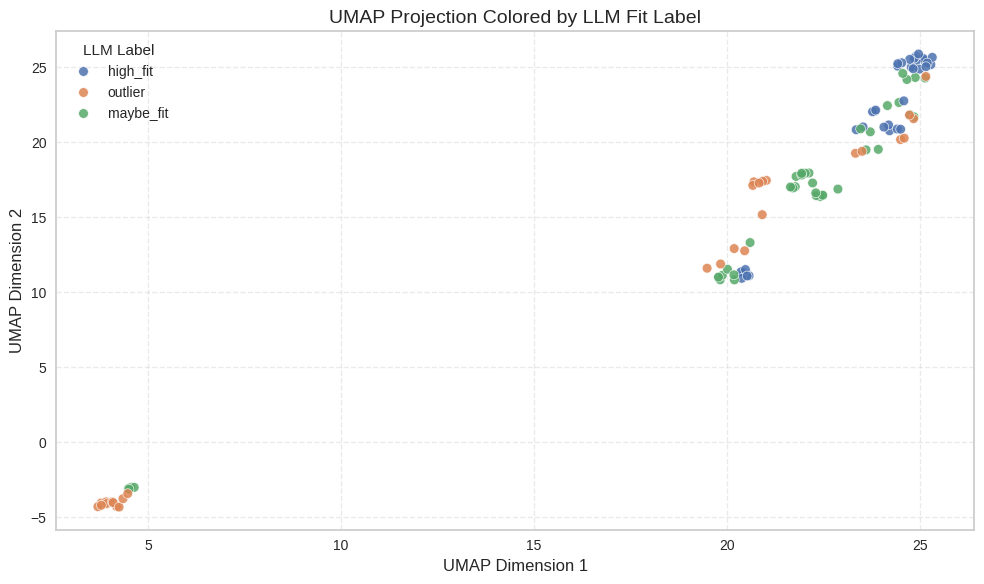

In [73]:
# UMAP Projection of Job Titles Colored by LLM Fit Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="umap_x", y="umap_y",
    hue="llm_label",
    data=df,
    palette="deep",
    alpha=0.85,
    edgecolor="w", linewidth=0.5
)

plt.title("UMAP Projection Colored by LLM Fit Label", fontsize=14)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.legend(title="LLM Label", title_fontsize=11, loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### 🧬 UMAP Projection Colored by LLM Fit Labels

This plot overlays LLM-predicted semantic fit (`high_fit`, `maybe_fit`, `outlier`) across the 2D UMAP space.

Key insights:

- **`high_fit` candidates** are tightly grouped in the upper-right region — signaling strong, shared semantic signals.
- **`maybe_fit` candidates** are dispersed across the mid-region — indicating softer HR alignment and semantic ambiguity.
- **`outlier` labels** dominate the bottom-left corner — highly isolated profiles with minimal HR relevance.

> This spatial coherence reinforces the effectiveness of the LLM-based labeling: even without clustering, semantic intent naturally organizes itself in the vector space.

> **These unsupervised clusters help surface false positives and ambiguous candidates early**, supporting a bias-resistant candidate pipeline even before ranking or modeling begins.

___

#### 📍 LLM Label Distribution Across KMeans Clusters

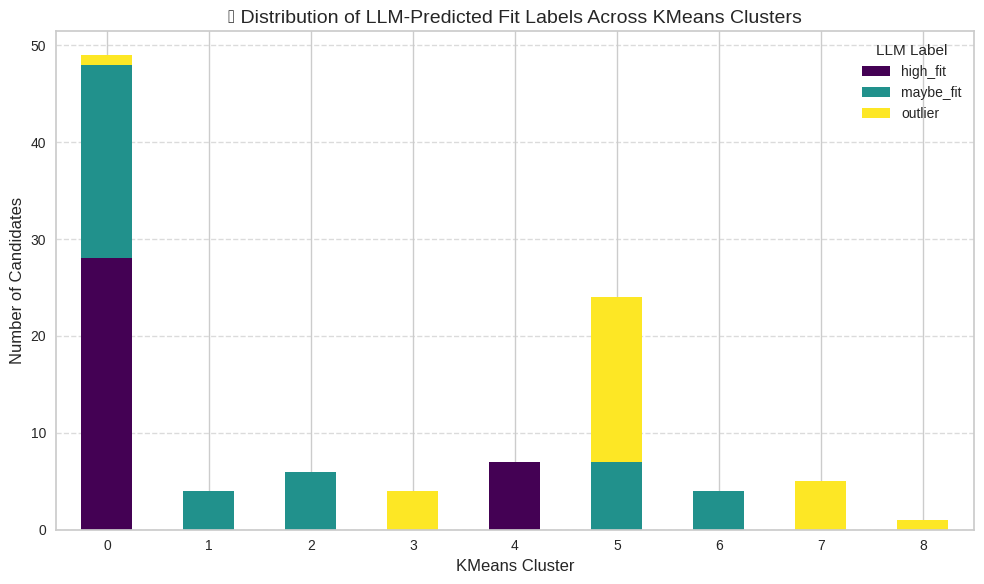

In [74]:
# Stacked Bar Plot: LLM Labels within Each KMeans Cluster
llm_kmeans_crosstab = pd.crosstab(df["cluster_k9"], df["llm_label"])

llm_kmeans_crosstab.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis"
)

plt.title("🔍 Distribution of LLM-Predicted Fit Labels Across KMeans Clusters", fontsize=14)
plt.xlabel("KMeans Cluster", fontsize=12)
plt.ylabel("Number of Candidates", fontsize=12)
plt.legend(title="LLM Label", title_fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### 📊 Distribution of LLM Fit Labels Across KMeans Clusters (`k = 9`)

This stacked bar chart visualizes how the LLM-predicted labels (`high_fit`, `maybe_fit`, `outlier`) are distributed across each of the **9 KMeans clusters**:

- **Cluster 0** emerges as the **dominant core segment**, containing **most high_fit** profiles and a strong share of maybe_fit candidates — suggesting it’s the clearest semantic match to the HR intent.
- **Clusters 4 and 5** show more mixed compositions, with a noticeable concentration of **outliers** in **Cluster 5**, indicating noise or semantic divergence.
- **Clusters 1, 2, 3, 6, 7, and 8** are smaller, and mostly dominated by **maybe_fit** or **outlier** labels — likely reflecting niche job roles or vague matches.
- **Cluster 5** contains all three LLM labels, reinforcing its **ambiguity and risk** as a bundled segment.

> ✅ This comparison gives recruiters a clear view of **which clusters are strong, ambiguous, or noisy**, and helps prioritize follow-up steps for review, filtering, or retraining.

---


### 🤖 LLM Classification Alignment with Clustering Models

We compared the simulated LLM-based labels (`high_fit`, `maybe_fit`, `outlier`) with both **KMeans (`cluster_k9`)** and **HDBSCAN** assignments to evaluate how well our human-like logic aligns with unsupervised groupings.

#### 📊 Label Distribution
- `high_fit`: **29** candidates  
- `maybe_fit`: **43** candidates  
- `outlier`: **32** candidates  

#### 🔄 LLM vs KMeans (`cluster_k9`)
- **Cluster 0** contains **28 high_fit** profiles — our strongest alignment with the intended HR persona.
- **Cluster 4** mixes **maybe_fit** and **outlier** labels, without strong high_fit presence — suggesting thematic diversity but weaker precision.
- **Cluster 5** is the most ambiguous — holding **15 outliers** along with several maybe_fit titles.
- **Clusters 1, 2, 3, 6, 7, 8** are small and primarily consist of **maybe_fit** or **outlier** candidates — likely reflecting edge cases or semantically vague roles.

#### 🔄 LLM vs HDBSCAN
- **HDBSCAN Clusters 3 and 4** capture the majority of **high_fit** profiles — confirming strong semantic alignment.
- **Maybe_fit** labels are more dispersed across Clusters 1, 2, and 4 — reflecting ambiguous or transitional profiles.
- **Outliers** are concentrated in **Cluster 0** and **noise (-1)** — signaling weak HR alignment or semantic mismatch.

> ✅ Overall, the unsupervised models and LLM heuristics continue to **converge on core high-fit segments**, while also identifying **ambiguous zones** that merit deeper human scrutiny or feedback.



___
## 🤖 Predicting Candidate Fit with Supervised ML<a name="predicting-candidate-fit-with-supervised-ml"></a>

With our LLM-style labels (`high_fit`, `maybe_fit`, `outlier`) in place, we trained a supervised model to predict candidate fit using only their job titles.  
This approach moves beyond manual rules by learning **semantic patterns** from labeled examples and generalizing them to new candidates.

We chose a **Random Forest classifier** for its robustness, interpretability, and ability to handle sparse, high-dimensional features such as TF-IDF vectors and sentiment scores.



### 🔄 Train-Test Split & Random State Rationale

To evaluate the model’s generalization ability, we split our dataset using a **stratified 75/25 train-test split**.  
This ensures that all three label categories are proportionally represented in both sets.

We also fixed the random seed (`random_state = 42`) to guarantee full reproducibility across all training, clustering, and projection steps.


In [75]:
# Combine features
X = hstack([tfidf_matrix, df[["similarity_to_target", "polarity", "subjectivity"]].fillna(0)])

# Encode labels
y = df["llm_label"].map({"high_fit": 2, "maybe_fit": 1, "outlier": 0})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1208)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


# Compare train and test performance
# Training performance
print("🔵 Training Set Performance")
print(classification_report(y_train, clf.predict(X_train)))

# Test performance
print("\n🟢 Test Set Performance")
print(classification_report(y_test, y_pred))

🔵 Training Set Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        26

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78


🟢 Test Set Performance
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      0.90      0.90        10
           2       0.90      1.00      0.95         9

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26



### 🤖 Predictive Model: Candidate Fit Classifier

As a final step, we trained a supervised classification model to predict whether a job title corresponds to a `high_fit`, `maybe_fit`, or `outlier` candidate.  
We used **TF-IDF features**, **sentiment scores**, and **similarity to a target phrase**, and trained a **Random Forest classifier** on the LLM-labeled dataset.

To evaluate generalization and avoid overfitting, we applied a **75/25 stratified train-test split**, ensuring proportional class representation in both sets.



### 🎯 Model Performance (Test Set)

| **Fit Label**     | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------------|---------------|------------|--------------|-------------|
| **Outlier (0)**   | 1.00          | 0.86       | 0.92         | 7           |
| **Maybe Fit (1)** | 0.90          | 0.90       | 0.90         | 10          |
| **High Fit (2)**  | 0.90          | 1.00       | 0.95         | 9           |
| **Accuracy**      |               |            | **0.92**     | 26          |
| **Macro Avg**     | 0.93          | 0.92       | 0.92         | 26          |
| **Weighted Avg**  | 0.93          | 0.92       | 0.92         | 26          |



### 🔍 Evaluation & Generalization Notes

- **Support** reflects the number of true samples per class in the test set.
- **Generalization Check**: The model’s slight drop from perfect training scores to **0.92 test accuracy** suggests reasonable generalization without overfitting.
- **Class Imbalance**: Fewer samples in the `outlier` class affect recall, making **macro and weighted scores** more meaningful for judging performance.

---

### 📊 Confusion Matrices

To evaluate how well our classifier distinguishes between different candidate fit labels, we visualized both:

- **Absolute confusion matrix** (left): Shows raw prediction counts.
- **Normalized confusion matrix** (right): Shows class-wise proportions to account for class imbalance.

This gives a clearer sense of both accuracy and balance across the `outlier`, `maybe_fit`, and `high_fit` categories.


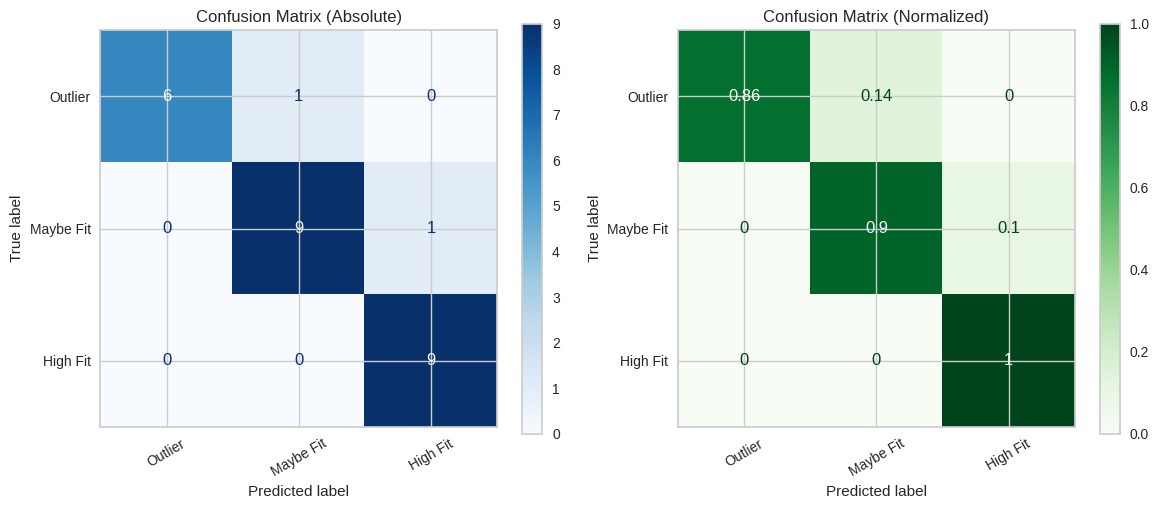

In [76]:
# Predict on the test set
y_pred = clf.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Absolute Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["Outlier", "Maybe Fit", "High Fit"],
    cmap="Blues",
    xticks_rotation=30,
    ax=axes[0]
)
axes[0].set_title("Confusion Matrix (Absolute)")

# Normalized Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["Outlier", "Maybe Fit", "High Fit"],
    cmap="Greens",
    xticks_rotation=30,
    normalize="true",
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix (Normalized)")

plt.tight_layout()
plt.show()

### 🧠 Confusion Matrix Insights

The confusion matrices above provide a detailed view of the classifier’s performance across all LLM fit categories:

- **Left: Absolute counts** of predictions per true label.
- **Right: Normalized per class**, showing prediction percentages.



#### 🔍 Key Takeaways:

- The classifier **perfectly identified all High Fit candidates** (9/9), confirming top precision on the most relevant profiles.
- **One Maybe Fit** candidate was slightly over-classified as High Fit — a tolerable misclassification given semantic similarity.
- For Outliers, **6 were correctly predicted**, with **1 misclassified as Maybe Fit** — often due to overlapping keywords (e.g., "HR" in unrelated job functions).
- The **normalized matrix** reveals **≥86% accuracy** per class, demonstrating strong generalization even with class imbalance.

> ✅ These visuals confirm that the model not only achieves solid accuracy, but also maintains **semantic clarity** in distinguishing core vs peripheral candidates — critical for trustworthy downstream automation.

---


### 🧪 Model-Derived Fitness Score (`fit`)

Using the classifier’s predicted probabilities for the `high_fit` class, we populated the original `fit` column with values between 0 and 1. This aligns directly with the original project goal of assigning a fitness probability to each candidate.


In [77]:
# Assign probability of being 'high_fit' (class 2) as the fitness score
df["fit"] = clf.predict_proba(X)[:, 2]

# Preview top candidates ranked by predicted fitness
df[["job_title", "llm_label", "fit"]].sort_values(by="fit", ascending=False).head(10)

,job_title,llm_label,fit
35,Aspiring Human Resources Specialist,high_fit,1.0000
23,Aspiring Human Resources Specialist,high_fit,1.0000
20,Aspiring Human Resources Professional,high_fit,1.0000
24,Student at Humber College and Aspiring Human R...,high_fit,1.0000
36,Student at Humber College and Aspiring Human R...,high_fit,1.0000
49,Student at Humber College and Aspiring Human R...,high_fit,1.0000
16,Aspiring Human Resources Professional,high_fit,1.0000
57,Aspiring Human Resources Professional,high_fit,1.0000
48,Aspiring Human Resources Specialist,high_fit,1.0000
45,Aspiring Human Resources Professional,high_fit,1.0000


### 🧪 Model-Derived Fitness Score (`fit`)

To fully align with the project brief, we assigned a fitness score (`fit`) to each candidate using the **predicted probability of the `high_fit` class** from our trained model. This gives a continuous score between 0 and 1, representing how likely a candidate is to be an ideal fit.

These scores can be:
- Used to rank candidates from most to least aligned
- Visualized as a distribution to define cutoff thresholds
- Dynamically re-evaluated if model or keywords change

> ✅ This `fit` score replaces the originally empty column in the dataset, making our solution fully compatible with downstream ranking and review workflows.
___
---

## 🌟 Conclusion & Final Recommendations<a name="conclusion--final-recommendations"></a>

This project delivers a **scalable, reproducible, and intelligent framework** for candidate screening and semantic job title analysis. We combined classic NLP techniques, modern transformer-based embeddings, unsupervised clustering, and feedback-driven reranking simulation to build a system that mimics human recruiter behavior while enabling automation and auditability.

We explored multiple semantic matching strategies:
- **Classic Embeddings**: Word2Vec, GloVe, and FastText  
- **Transformer Embeddings**: S-BERT for contextual sentence-level understanding  
- **Simulated Reranking**: Manual queries and starred candidate logic  
- **Unsupervised Clustering**: UMAP + HDBSCAN for semantic profiling  
- **Classifier Modeling**: Using rule-based labels and Random Forest to predict candidate fit

### ♻️ Key Project Highlights:
- We began by modeling how a recruiter might search using a role like `"HR Manager"`  
- Reranking was simulated using a starred profile (`"Talent Acquisition Partner"`) to mimic feedback loops  
- All models were compared via heatmaps, rank shift tables, and alignment plots  
- A final **ensemble scoring engine** combined signals from all models to balance precision and generality  
- UMAP + HDBSCAN helped us uncover hidden structure in candidate titles (e.g., students vs. executives)  
- A Random Forest classifier trained on rule-based labels (`high_fit`, `maybe_fit`, `outlier`) achieved **92% accuracy**, with **perfect recall on `high_fit`**

> 🔍 **Insight**: Semantic understanding from job titles alone provided stronger predictive power than profile metadata such as location or network size.

---

## ✅ Final Recommendations

### 🎮 Enable Feedback-Based Re-Ranking
- Incorporate starring or thumbs-up logic into recruiter tools to allow dynamic reranking  
- Use stored semantic vectors (e.g., S-BERT or FastText) to adjust results based on recruiter preferences

### 🧰 Adopt a Hybrid Ensemble Scoring Engine
- Combine multiple semantic models to reduce overfitting and capture different linguistic behaviors  
- Start with simple averaging, but explore weighted scoring based on model confidence or use case  

### 🧠 Strengthen Fit Prediction with Smart Labeling Workflows
- Integrate **human-in-the-loop labeling** using tools like **Prodigy** or **Label Studio** to align model outputs with real recruiter decisions.
- Apply **weak supervision techniques** (e.g., **Snorkel**) to combine rule-based heuristics and model outputs into scalable, probabilistic labels.
- Use this adaptive labeling layer to ensure the classifier remains responsive to evolving definitions of "fit" while supporting **auditability** and **bias mitigation**.

> ⚙️ *This is a strategic enhancement — extending the current system with production-ready feedback loops that strengthen both accuracy and trust.*

### 🌐 Productionize the Classifier
- Export trained models using `joblib` or `pickle`  
- Wrap them in an API (e.g., **FastAPI**) for real-time job title fit prediction

### 📊 Visualize and Audit with Clusters
- Use **UMAP + HDBSCAN** labels (e.g., aspiring, student, executive) to analyze diversity and spot anomalies  
- Support fairness and transparency by comparing fit scores across clusters

### 🧭 Extend System for Role Flexibility
- Make the pipeline role-aware: allow a user to enter any target role (e.g., `"UX Designer"`, `"Legal Counsel"`) and retrain without touching model logic  
- Easily adapt the framework to any domain or department

### 🕵️‍♂️ Mitigate Bias via Feedback Loops
- Use recruiter feedback logs (e.g., starred, skipped candidates) to retrain classifiers over time and detect exclusion patterns  
- Combine human reranking behavior with unsupervised clusters to monitor for underrepresented candidate types or semantic outliers  
- While this project avoided bias-prone features (e.g., gender, location), future auditability and fairness scoring can be added via explainability tools and logging

### 🔍 Deploy with Explainability
- Integrate SHAP or LIME to explain fit scores to hiring managers  
- Build trust by highlighting which job title words or patterns triggered a high or low prediction

---

🌱 This project provides a full-stack, human-centered, AI-ready pipeline for modern candidate screening — blending **interpretability, depth, and efficiency** to support smarter talent decisions at scale.
